In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 


# holt's linear trend model. 
from statsmodels.tsa.api import Holt

### Acquire

In [2]:
# overall CPI for the South Region whch includes Houston Metro
south_region_cpi = pd.read_excel('CPI_for_south_region_09_21.xlsx',index_col=None, header= 11)

south_region_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2009.0,204.288,205.343,206.001,206.657,207.265,209.343,208.819,209.000,208.912,209.292,209.738,209.476,207.845,206.483,209.206
1,2010.0,210.056,210.020,211.216,211.528,211.423,211.232,210.988,211.308,211.775,212.026,211.996,212.488,211.338,210.913,211.764
2,2011.0,213.589,214.735,217.214,218.820,219.820,219.318,219.682,220.471,220.371,219.969,219.961,219.469,218.618,217.249,219.987
3,2012.0,220.497,221.802,223.314,224.275,223.356,223.004,222.667,223.919,225.052,224.504,223.404,223.109,223.242,222.708,223.776
4,2013.0,223.933,225.874,226.628,226.202,226.289,227.148,227.548,227.837,227.876,227.420,226.811,227.082,226.721,226.012,227.429
5,2014.0,227.673,228.664,230.095,231.346,231.762,232.269,232.013,231.611,231.762,231.131,229.845,228.451,230.552,230.302,230.802
6,2015.0,226.855,227.944,229.337,229.957,230.886,232.026,231.719,231.260,230.913,230.860,230.422,229.581,230.147,229.501,230.793
7,2016.0,229.469,229.646,230.977,231.975,232.906,233.838,233.292,233.561,234.069,234.337,234.029,234.204,232.692,231.469,233.915
8,2017.0,235.492,236.052,236.154,236.728,236.774,237.346,236.942,237.892,239.649,239.067,238.861,238.512,237.456,236.424,238.487
9,2018.0,239.772,241.123,241.595,242.486,243.279,243.770,243.776,243.605,243.640,244.163,243.484,242.150,242.737,242.004,243.470


In [3]:
# Overall CPI for Houston Metro Area
houston_overall_cpi = pd.read_excel('houston_metro_CPI_all_item_09_to_21.xlsx',index_col=None, header= 11)

houston_overall_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2009.0,NaN,187.972,NaN,189.701,NaN,192.325,NaN,191.687,NaN,191.608,NaN,190.932,190.495,189.465,191.525
1,2010.0,NaN,192.412,NaN,194.037,NaN,194.734,NaN,195.165,NaN,195.094,NaN,194.479,194.172,193.410,194.934
2,2011.0,NaN,197.224,NaN,201.624,NaN,201.309,NaN,202.445,NaN,201.398,NaN,200.477,200.495,199.480,201.509
3,2012.0,NaN,204.291,NaN,206.088,NaN,204.829,NaN,203.959,NaN,204.139,NaN,202.477,204.213,204.705,203.721
4,2013.0,NaN,205.716,NaN,207.506,NaN,207.882,NaN,208.575,NaN,207.788,NaN,209.814,207.574,206.583,208.564
5,2014.0,NaN,211.745,NaN,213.309,NaN,214.668,NaN,214.102,NaN,214.791,NaN,212.169,213.365,212.835,213.895
6,2015.0,NaN,210.283,NaN,212.439,NaN,213.896,NaN,214.652,NaN,214.569,NaN,212.936,213.039,211.926,214.152
7,2016.0,NaN,214.505,NaN,215.513,NaN,217.305,NaN,216.582,NaN,218.200,NaN,217.758,216.414,215.237,217.592
8,2017.0,NaN,219.061,NaN,219.852,NaN,220.805,NaN,221.255,NaN,223.213,NaN,221.568,220.657,219.513,221.800
9,2018.0,NaN,224.711,NaN,225.116,NaN,227.393,NaN,226.307,NaN,228.070,NaN,226.557,225.927,224.763,227.091


#### CPI item categories for Houston

In [4]:
# Code to bring in electricity CPI
electricity_cpi = pd.read_excel('CPI_electricity_09_to_21.xlsx',index_col=None, header= 9)

electricity_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2009.0,0.164,0.166,0.165,0.165,0.165,0.167,0.148,0.147,0.147,0.147,0.148,0.148
1,2010.0,0.148,0.148,0.149,0.150,0.149,0.149,0.150,0.150,0.150,0.150,0.149,0.150
2,2011.0,0.149,0.149,0.149,0.149,0.150,0.150,0.150,0.150,0.150,0.150,0.154,0.154
3,2012.0,0.154,0.157,0.155,0.155,0.155,NaN,0.114,0.117,0.108,0.112,0.114,0.116
4,2013.0,0.111,0.110,0.112,0.119,0.127,0.127,0.127,0.123,0.116,0.116,0.113,0.121
5,2014.0,0.131,0.147,0.140,0.136,0.139,0.137,0.134,0.125,0.129,0.127,0.125,0.133
6,2015.0,0.116,0.111,0.110,0.106,0.105,0.107,0.107,0.108,0.107,0.106,0.100,0.102
7,2016.0,0.105,0.103,0.093,0.095,0.097,0.097,0.110,0.106,0.115,0.112,0.110,0.115
8,2017.0,0.125,0.117,0.103,0.111,0.111,0.112,0.110,0.108,0.112,0.126,0.122,0.129
9,2018.0,0.124,0.137,0.118,0.119,0.125,0.126,0.125,0.123,0.127,0.138,0.138,0.157


In [5]:
# Code to bring in utility gas CPI
utility_gas_cpi = pd.read_excel('CPI_utility_gas_09_to21.xlsx',index_col=None, header= 9)

utility_gas_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2009.0,1.478,1.339,1.339,1.339,1.339,1.339,1.325,1.145,1.145,1.145,1.145,1.145
1,2010.0,1.145,1.237,1.237,1.251,1.240,1.241,1.242,1.010,1.014,1.014,1.014,0.948
2,2011.0,0.948,0.947,0.947,0.947,0.947,0.947,0.948,1.064,1.060,1.000,1.000,1.000
3,2012.0,1.000,0.847,0.848,0.848,0.860,0.848,0.848,0.980,0.980,0.986,0.985,1.020
4,2013.0,1.020,1.055,1.055,1.066,1.144,1.158,1.158,1.011,1.012,1.012,1.012,1.012
5,2014.0,1.012,1.060,1.060,1.075,1.059,1.059,1.060,0.982,0.982,0.982,0.982,0.982
6,2015.0,0.982,0.913,0.913,0.928,0.913,0.913,0.913,0.866,0.866,0.866,0.866,0.866
7,2016.0,0.866,0.807,0.807,0.806,0.806,0.806,0.816,0.894,0.894,0.894,0.893,0.893
8,2017.0,0.893,0.936,0.936,0.936,0.936,0.954,0.964,0.978,0.979,0.979,0.980,0.980
9,2018.0,0.979,0.971,0.971,0.986,1.152,1.152,1.172,1.159,1.140,1.009,1.140,1.140


In [6]:
# Code to bring in unleaded gas CPI
unleaded_gas_cpi = pd.read_excel('CPI_gas_09_to_2021.xlsx',index_col=None, header= 9)

unleaded_gas_cpi

/usr/local/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2009.0,1.616,1.829,1.822,2.009,2.125,2.452,2.411,2.519,2.370,2.323,2.449,2.414
1,2010.0,2.541,2.451,2.550,2.679,2.698,2.572,2.516,2.525,2.455,2.589,2.611,2.750
2,2011.0,2.896,2.969,3.365,3.697,3.834,3.530,3.497,3.510,3.370,3.188,3.171,3.044
3,2012.0,3.191,3.412,3.661,3.824,3.640,3.335,3.241,3.444,3.593,3.458,3.191,3.072
4,2013.0,3.131,3.447,3.542,3.454,3.395,3.349,3.441,3.424,3.291,3.074,2.948,3.053
5,2014.0,3.081,3.090,3.248,3.405,3.400,3.401,3.412,3.255,3.135,2.961,2.684,2.337
6,2015.0,1.875,1.966,2.164,2.195,2.388,2.490,2.487,2.345,2.105,1.948,1.856,1.739
7,2016.0,1.629,1.493,1.652,1.833,1.971,2.070,2.001,1.908,1.931,1.964,1.924,1.951
8,2017.0,2.091,2.023,2.023,2.194,2.167,2.085,1.996,2.082,2.413,2.236,2.172,2.116
9,2018.0,2.187,2.262,2.226,2.427,2.583,2.645,2.583,2.532,2.502,2.538,2.324,1.989


**Takeaways**

The majority of current acquired data tables have no null values.
Houston Metro CPI data is collected every second month 



Things to do:

- Inpute null values in Houston Metro

### Prepare

To get a MVP in a timely manner:

- it was determine to just utilize the only Houston metro CPI data
- In future will incoprate CPI of item categories in future revision of project

#### Code to make new dataframe of ratios of CPI

In [7]:
ratio = houston_overall_cpi["Year"]
#ratio['half1_ratio'] = (houston_overall_cpi["HALF1"] / south_region_cpi["HALF1"])
#ratio['half2_ratio'] = houston_overall_cpi["HALF2"] / south_region_cpi["HALF2"]
ratio

0     2009.0
1     2010.0
2     2011.0
3     2012.0
4     2013.0
5     2014.0
6     2015.0
7     2016.0
8     2017.0
9     2018.0
10    2019.0
11    2020.0
12    2021.0
Name: Year, dtype: float64

In [8]:
([houston_overall_cpi["HALF1"] / south_region_cpi["HALF1"]])

[0     0.917582
 1     0.917013
 2     0.918209
 3     0.919163
 4     0.914036
 5     0.924156
 6     0.923421
 7     0.929874
 8     0.928472
 9     0.928757
 10    0.929862
 11    0.924347
 12    0.917177
 Name: HALF1, dtype: float64]

In [9]:
(houston_overall_cpi["HALF2"] / south_region_cpi["HALF2"])

0     0.915485
1     0.920525
2     0.916004
3     0.910379
4     0.917051
5     0.926747
6     0.927896
7     0.930218
8     0.930030
9     0.932727
10    0.928297
11    0.919005
12    0.912322
Name: HALF2, dtype: float64

In [10]:
pd.DataFrame(ratio)

,Year
0,2009.0
1,2010.0
2,2011.0
3,2012.0
4,2013.0
5,2014.0
6,2015.0
7,2016.0
8,2017.0
9,2018.0


### Fill in nulls in Houston CPI table

In [11]:
houston_overall_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2009.0,NaN,187.972,NaN,189.701,NaN,192.325,NaN,191.687,NaN,191.608,NaN,190.932,190.495,189.465,191.525
1,2010.0,NaN,192.412,NaN,194.037,NaN,194.734,NaN,195.165,NaN,195.094,NaN,194.479,194.172,193.410,194.934
2,2011.0,NaN,197.224,NaN,201.624,NaN,201.309,NaN,202.445,NaN,201.398,NaN,200.477,200.495,199.480,201.509
3,2012.0,NaN,204.291,NaN,206.088,NaN,204.829,NaN,203.959,NaN,204.139,NaN,202.477,204.213,204.705,203.721
4,2013.0,NaN,205.716,NaN,207.506,NaN,207.882,NaN,208.575,NaN,207.788,NaN,209.814,207.574,206.583,208.564
5,2014.0,NaN,211.745,NaN,213.309,NaN,214.668,NaN,214.102,NaN,214.791,NaN,212.169,213.365,212.835,213.895
6,2015.0,NaN,210.283,NaN,212.439,NaN,213.896,NaN,214.652,NaN,214.569,NaN,212.936,213.039,211.926,214.152
7,2016.0,NaN,214.505,NaN,215.513,NaN,217.305,NaN,216.582,NaN,218.200,NaN,217.758,216.414,215.237,217.592
8,2017.0,NaN,219.061,NaN,219.852,NaN,220.805,NaN,221.255,NaN,223.213,NaN,221.568,220.657,219.513,221.800
9,2018.0,NaN,224.711,NaN,225.116,NaN,227.393,NaN,226.307,NaN,228.070,NaN,226.557,225.927,224.763,227.091


In [12]:
# Fill Nulls for first half of the year months with CPI values of HALF1 of that corresponding year
houston_overall_cpi['Jan'] = houston_overall_cpi['HALF1']
houston_overall_cpi['Mar'] = houston_overall_cpi['HALF1']
houston_overall_cpi['May'] = houston_overall_cpi['HALF1']

# Fill Nulls for second half of the year months with CPI values of HALF2 of that corresponding year
houston_overall_cpi['Jul'] = houston_overall_cpi['HALF2']
houston_overall_cpi['Sep'] = houston_overall_cpi['HALF2']
houston_overall_cpi['Nov'] = houston_overall_cpi['HALF2']


In [13]:
# independent variable is time observation is dependent
houston_overall_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2009.0,189.465,187.972,189.465,189.701,189.465,192.325,191.525,191.687,191.525,191.608,191.525,190.932,190.495,189.465,191.525
1,2010.0,193.410,192.412,193.410,194.037,193.410,194.734,194.934,195.165,194.934,195.094,194.934,194.479,194.172,193.410,194.934
2,2011.0,199.480,197.224,199.480,201.624,199.480,201.309,201.509,202.445,201.509,201.398,201.509,200.477,200.495,199.480,201.509
3,2012.0,204.705,204.291,204.705,206.088,204.705,204.829,203.721,203.959,203.721,204.139,203.721,202.477,204.213,204.705,203.721
4,2013.0,206.583,205.716,206.583,207.506,206.583,207.882,208.564,208.575,208.564,207.788,208.564,209.814,207.574,206.583,208.564
5,2014.0,212.835,211.745,212.835,213.309,212.835,214.668,213.895,214.102,213.895,214.791,213.895,212.169,213.365,212.835,213.895
6,2015.0,211.926,210.283,211.926,212.439,211.926,213.896,214.152,214.652,214.152,214.569,214.152,212.936,213.039,211.926,214.152
7,2016.0,215.237,214.505,215.237,215.513,215.237,217.305,217.592,216.582,217.592,218.200,217.592,217.758,216.414,215.237,217.592
8,2017.0,219.513,219.061,219.513,219.852,219.513,220.805,221.800,221.255,221.800,223.213,221.800,221.568,220.657,219.513,221.800
9,2018.0,224.763,224.711,224.763,225.116,224.763,227.393,227.091,226.307,227.091,228.070,227.091,226.557,225.927,224.763,227.091


In [14]:
# Drop following columns
houston_overall_cpi.drop(columns= ["Annual", "HALF1", "HALF2"], inplace=True)

houston_overall_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2009.0,189.465,187.972,189.465,189.701,189.465,192.325,191.525,191.687,191.525,191.608,191.525,190.932
1,2010.0,193.410,192.412,193.410,194.037,193.410,194.734,194.934,195.165,194.934,195.094,194.934,194.479
2,2011.0,199.480,197.224,199.480,201.624,199.480,201.309,201.509,202.445,201.509,201.398,201.509,200.477
3,2012.0,204.705,204.291,204.705,206.088,204.705,204.829,203.721,203.959,203.721,204.139,203.721,202.477
4,2013.0,206.583,205.716,206.583,207.506,206.583,207.882,208.564,208.575,208.564,207.788,208.564,209.814
5,2014.0,212.835,211.745,212.835,213.309,212.835,214.668,213.895,214.102,213.895,214.791,213.895,212.169
6,2015.0,211.926,210.283,211.926,212.439,211.926,213.896,214.152,214.652,214.152,214.569,214.152,212.936
7,2016.0,215.237,214.505,215.237,215.513,215.237,217.305,217.592,216.582,217.592,218.200,217.592,217.758
8,2017.0,219.513,219.061,219.513,219.852,219.513,220.805,221.800,221.255,221.800,223.213,221.800,221.568
9,2018.0,224.763,224.711,224.763,225.116,224.763,227.393,227.091,226.307,227.091,228.070,227.091,226.557


#### Expand dataframe vertically to get more observations

In [15]:
# melt data frame by year with the month of corresponding year being the  observation
df = pd.melt(houston_overall_cpi, id_vars=["Year"], value_vars=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], var_name="month", value_name="CPI").sort_values(by=['Year'])
print(df.shape)
df

(156, 3)


,Year,month,CPI
0,2009.0,Jan,189.465
130,2009.0,Nov,191.525
117,2009.0,Oct,191.608
104,2009.0,Sep,191.525
91,2009.0,Aug,191.687
...,...,...,...
38,2021.0,Mar,235.254
25,2021.0,Feb,232.442
12,2021.0,Jan,235.254
142,2021.0,Nov,242.696


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    156 non-null    float64
 1   month   156 non-null    object 
 2   CPI     156 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


In [17]:
df.describe()

,Year,CPI
count,156.000000,156.000000
mean,2015.000000,214.216987
std,3.753708,14.129026
min,2009.000000,187.972000
25%,2012.000000,203.721000
50%,2015.000000,214.152000
75%,2018.000000,226.875750
max,2021.000000,245.509000


In [18]:
# Convert Year into Integer
df['Year'] = df.Year.astype(int)
df.dtypes

Year       int64
month     object
CPI      float64
dtype: object

In [19]:
df['year_month']=df.apply(lambda x:'%s-%s' % (x['Year'],x['month']),axis=1)
print(df.dtypes)
df

Year            int64
month          object
CPI           float64
year_month     object
dtype: object


,Year,month,CPI,year_month
0,2009,Jan,189.465,2009-Jan
130,2009,Nov,191.525,2009-Nov
117,2009,Oct,191.608,2009-Oct
104,2009,Sep,191.525,2009-Sep
91,2009,Aug,191.687,2009-Aug
...,...,...,...,...
38,2021,Mar,235.254,2021-Mar
25,2021,Feb,232.442,2021-Feb
12,2021,Jan,235.254,2021-Jan
142,2021,Nov,242.696,2021-Nov


In [20]:
# Convert combined into data time object

df.year_month = pd.to_datetime(df.year_month)
print(df.dtypes)
df

Year                   int64
month                 object
CPI                  float64
year_month    datetime64[ns]
dtype: object


,Year,month,CPI,year_month
0,2009,Jan,189.465,2009-01-01
130,2009,Nov,191.525,2009-11-01
117,2009,Oct,191.608,2009-10-01
104,2009,Sep,191.525,2009-09-01
91,2009,Aug,191.687,2009-08-01
...,...,...,...,...
38,2021,Mar,235.254,2021-03-01
25,2021,Feb,232.442,2021-02-01
12,2021,Jan,235.254,2021-01-01
142,2021,Nov,242.696,2021-11-01


In [21]:
# set index to year_month
df = df.set_index('year_month').sort_index()
df


,Year,month,CPI
year_month,,,
2009-01-01,2009,Jan,189.465
2009-02-01,2009,Feb,187.972
2009-03-01,2009,Mar,189.465
2009-04-01,2009,Apr,189.701
2009-05-01,2009,May,189.465
...,...,...,...
2021-08-01,2021,Aug,241.088
2021-09-01,2021,Sep,242.696
2021-10-01,2021,Oct,243.813


<AxesSubplot:xlabel='year_month'>

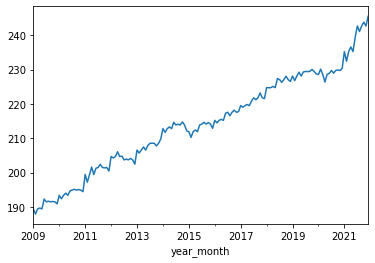

In [22]:
# Plot time series data
df.CPI.plot()

### Split data into samples

In [23]:
plt.rc('figure', figsize=(13, 7))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

In [24]:
# Train test split:
train = df[:'2014']
validate = df['2015':'2020']
test = df['2021']

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/271947401.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2021']


In [25]:

print(df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)


(156, 3)
(72, 3)
(72, 3)
(12, 3)


#### Exploration of samples

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

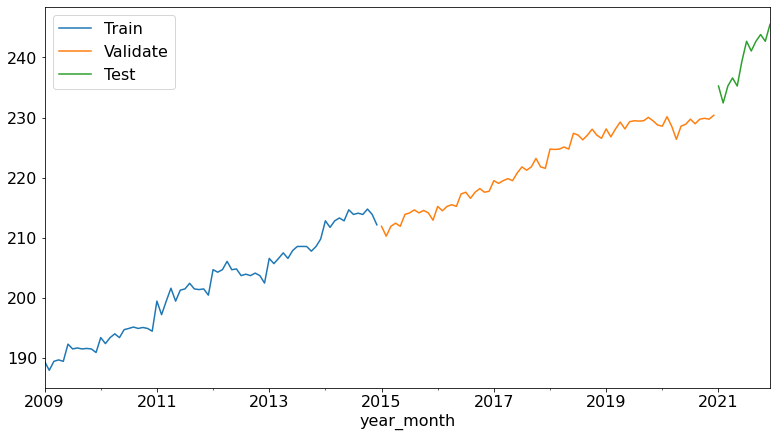

In [26]:
# Visualize the split data samples

train.resample('M').CPI.mean().plot()
validate.resample('M').CPI.mean().plot()
test.resample('M').CPI.mean().plot()
plt.legend(['Train', 'Validate', 'Test'])
plt

##### Exploration of train

<AxesSubplot:xlabel='year_month'>

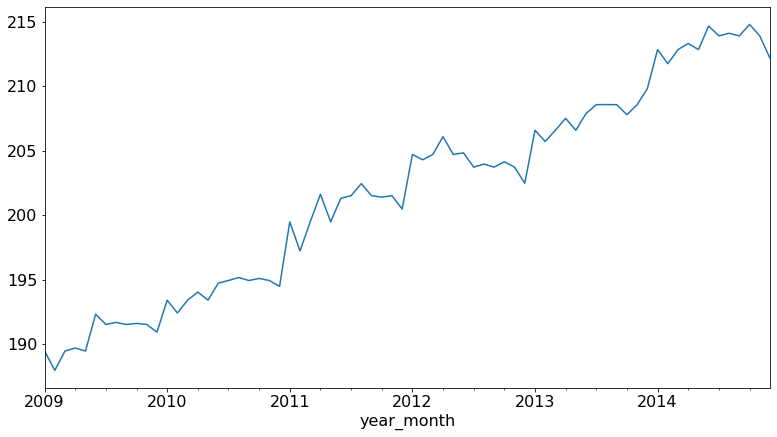

In [27]:
train.resample('M',closed='left').CPI.mean().plot()

<AxesSubplot:xlabel='year_month'>

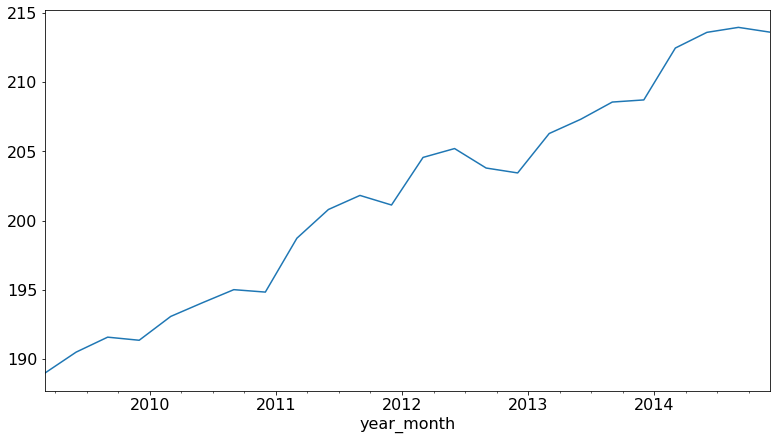

In [28]:
train.resample('3M',closed='left').CPI.mean().plot()

<AxesSubplot:xlabel='year_month'>

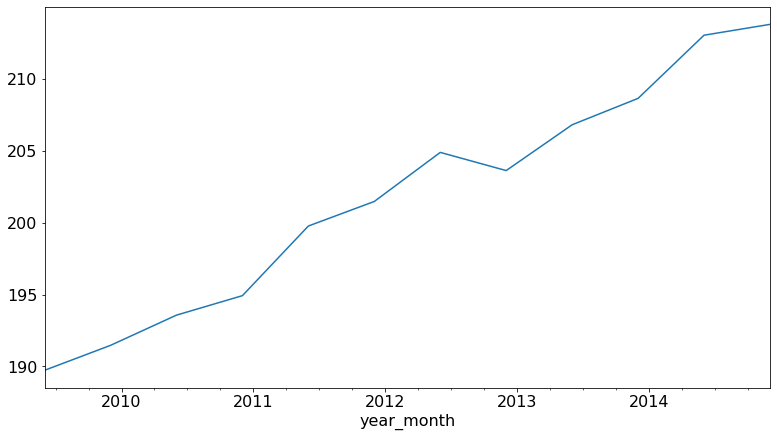

In [29]:
train.resample('6M',closed='left').CPI.mean().plot()

<AxesSubplot:xlabel='year_month'>

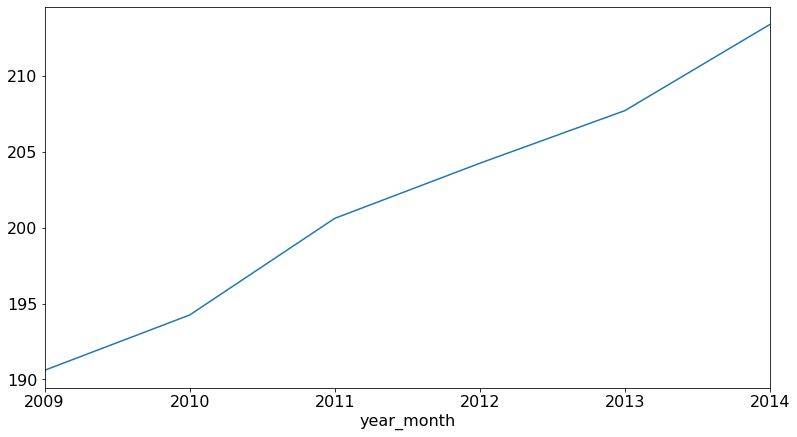

In [30]:
train.resample('Y',closed='left').CPI.mean().plot()

In [31]:
# y is the resampled monthly data:

y = train.resample('M').CPI.mean()
y.head()

year_month
2009-01-31    189.465
2009-02-28    187.972
2009-03-31    189.465
2009-04-30    189.701
2009-05-31    189.465
Freq: M, Name: CPI, dtype: float64

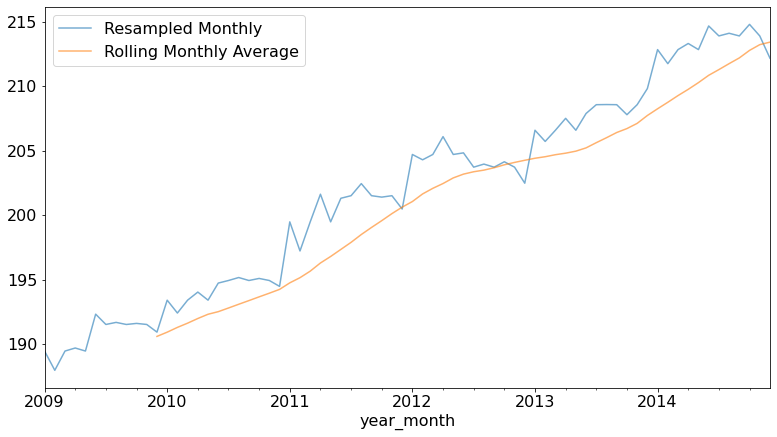

In [32]:
# Plot the Monthly average & the Monthly moving average. Compare the 2 plots.

y.resample('M').mean().plot(label='Resampled Monthly', alpha=.6)
y.rolling(12).mean().plot(label='Rolling Monthly Average', alpha=.6)
plt.legend()

Text(0, 0.5, 'Difference in CPI from one month to the next')

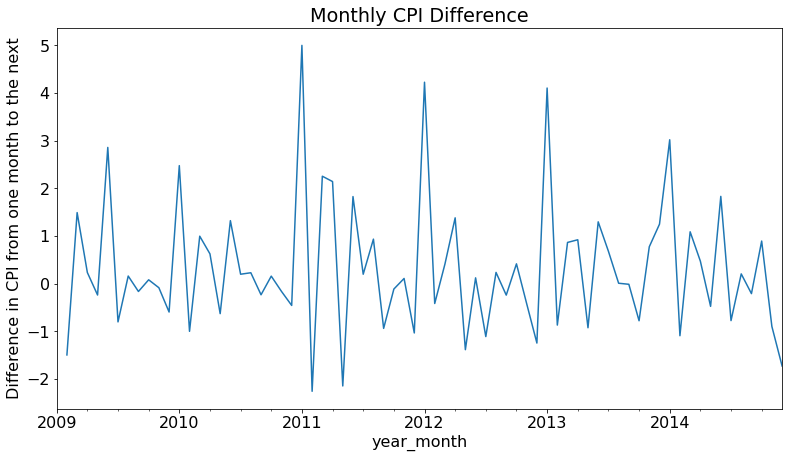

In [33]:
# Plot the daily difference. 
# Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

y.diff().plot()
plt.title('Monthly CPI Difference')
plt.ylabel('Difference in CPI from one month to the next')

Text(0, 0.5, '% Change')

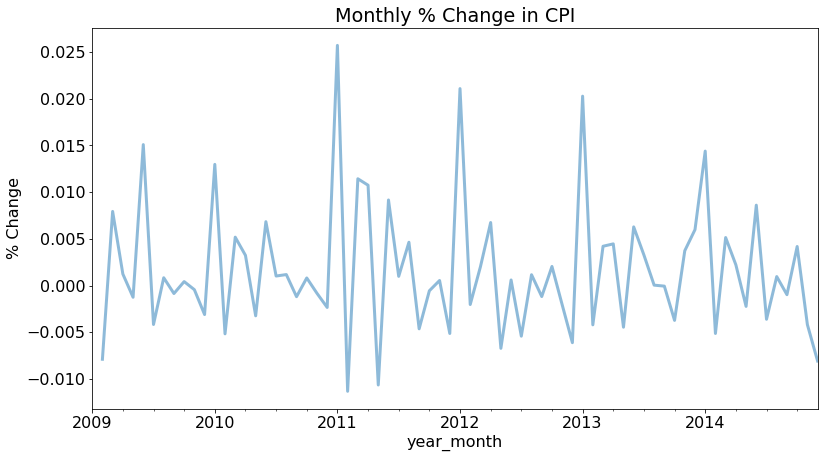

In [34]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5, lw=3)
plt.title('Monthly % Change in CPI')
plt.ylabel('% Change')

[Text(0.5, 1.0, 'Biannual % Change in CPI')]

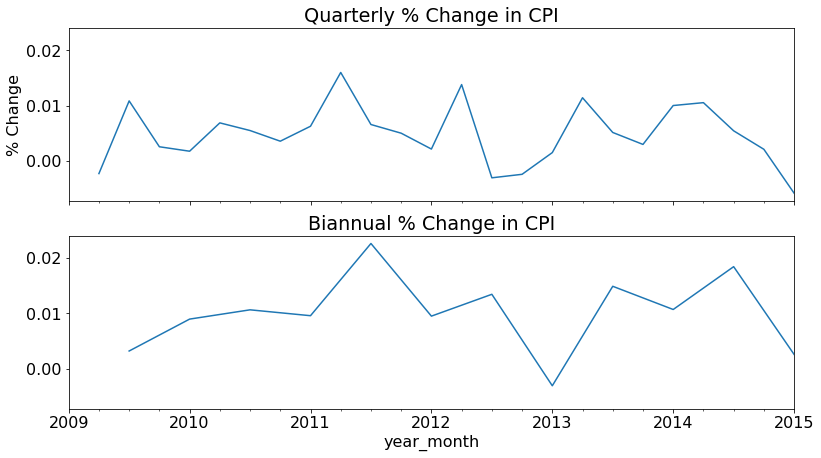

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

quarterly = y.resample('3M').mean()
(quarterly.diff() / quarterly.shift()).plot(ax=ax1)
ax1.set(title='Quarterly % Change in CPI', ylabel='% Change', xlabel='')

biannual = y.resample('6M').mean()
(biannual.diff() / biannual.shift()).plot(ax=ax2)
ax2.set(title='Biannual % Change in CPI')
# ax2.hlines(0, *ax2.get_xlim())

#### Autocorrelation charts

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

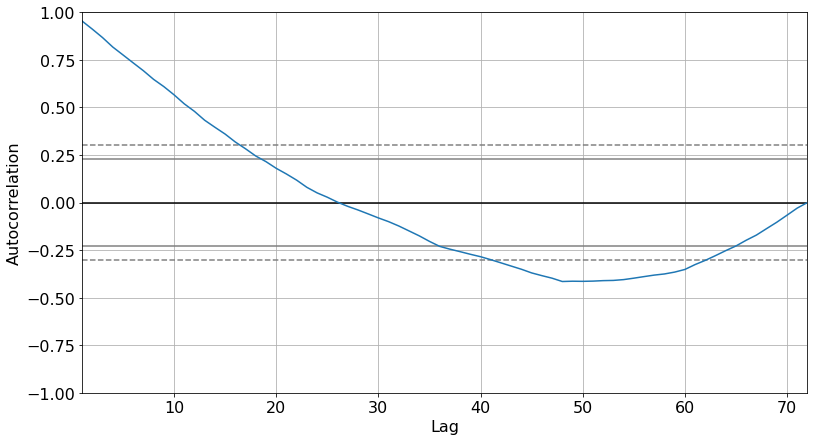

In [36]:
# Autocorrelation after Monthly resampling:

pd.plotting.autocorrelation_plot(y.resample('M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

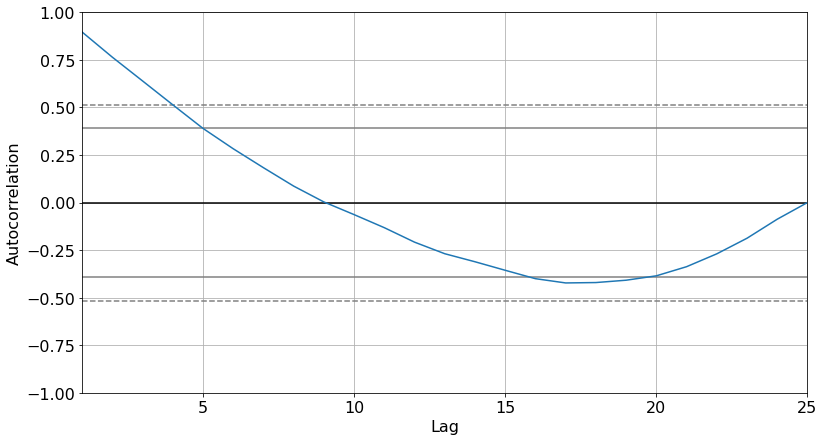

In [37]:
# Autocorrelation after Quarterly resampling:

pd.plotting.autocorrelation_plot(y.resample('3M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

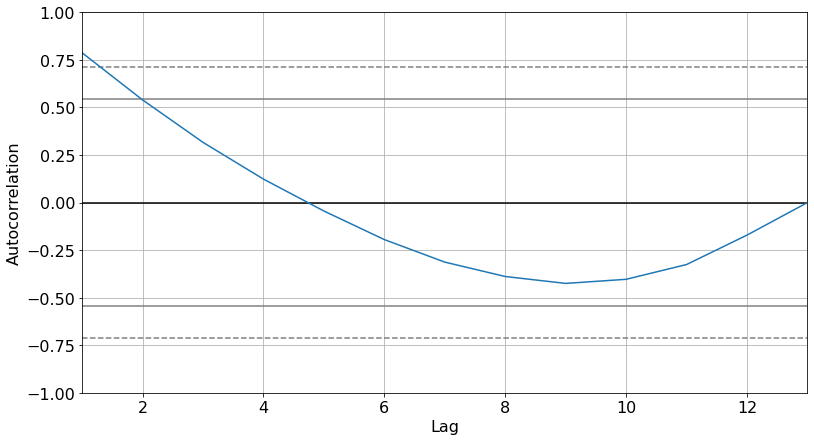

In [38]:
# Autocorrelation after Biannual resampling:

pd.plotting.autocorrelation_plot(y.resample('6M').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

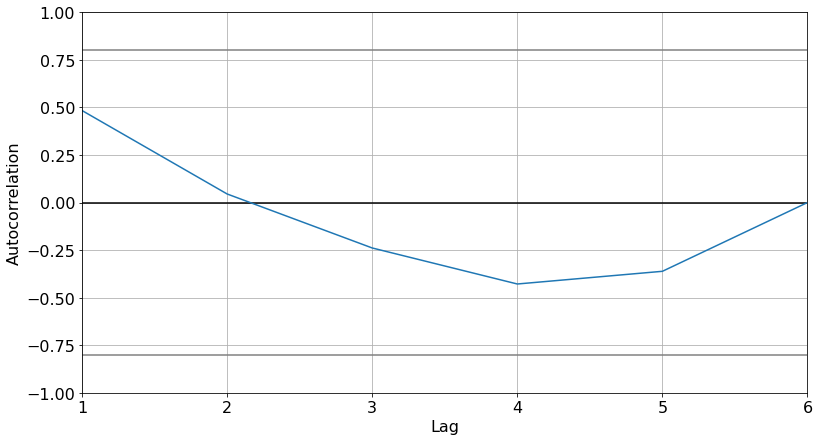

In [39]:
# Autocorrelation after Biannual resampling:

pd.plotting.autocorrelation_plot(y.resample('Y').mean())

#### Decomposing the data

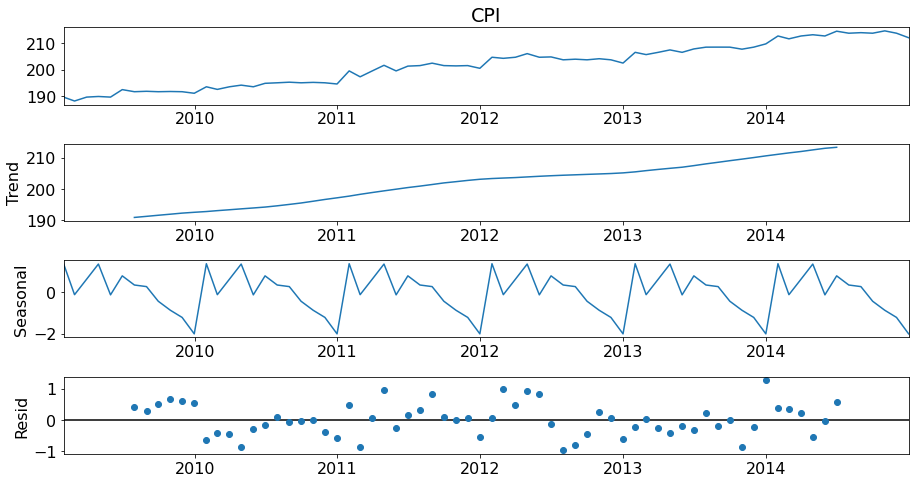

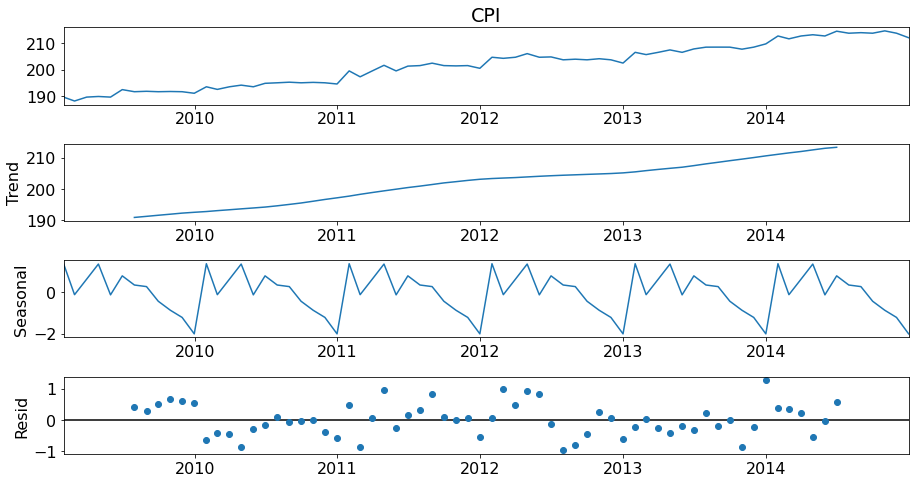

In [40]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()

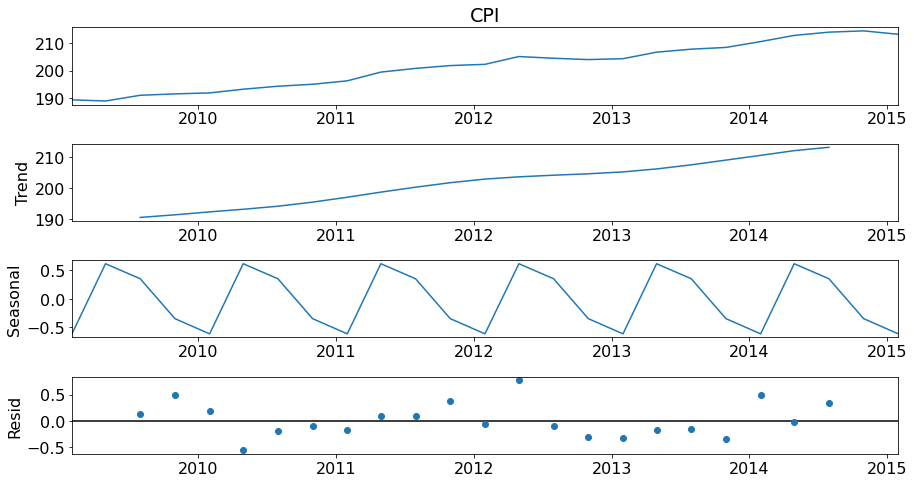

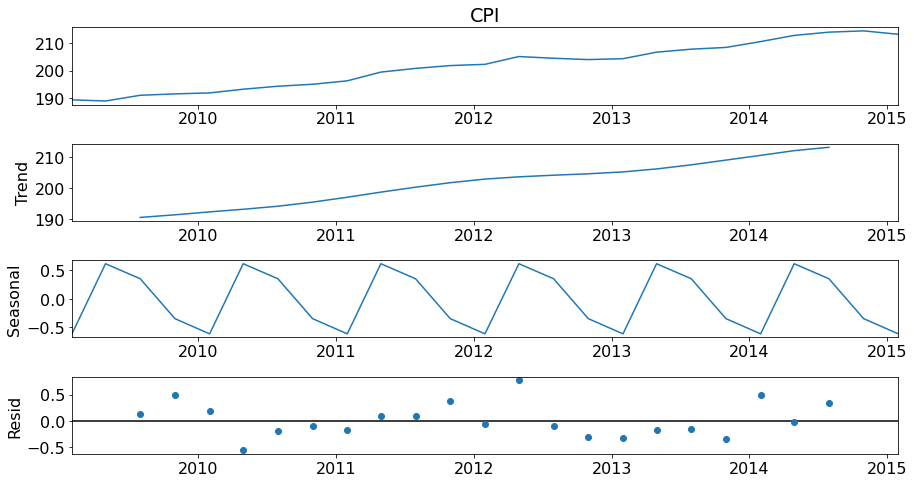

In [41]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('3M').mean()).plot()

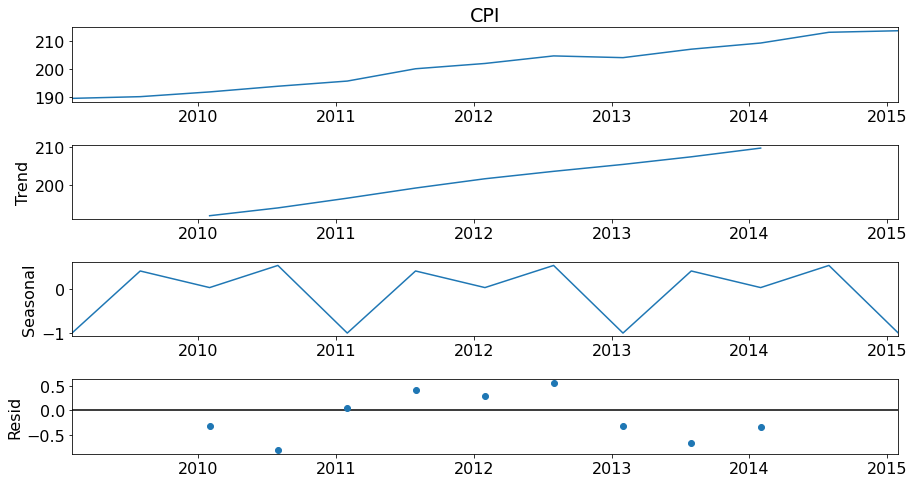

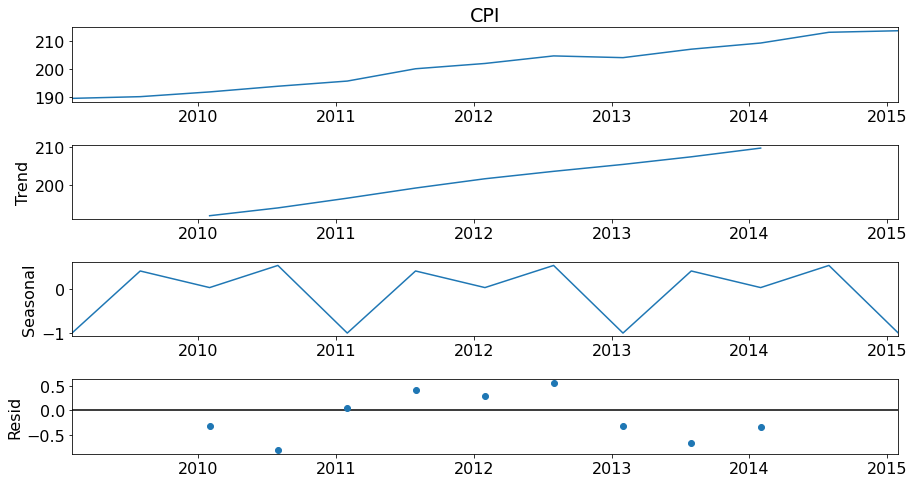

In [42]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('6M').mean()).plot()

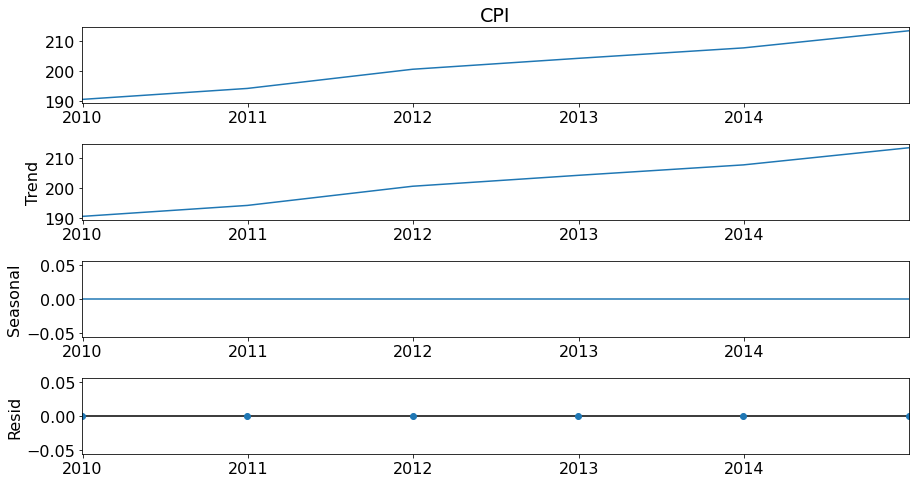

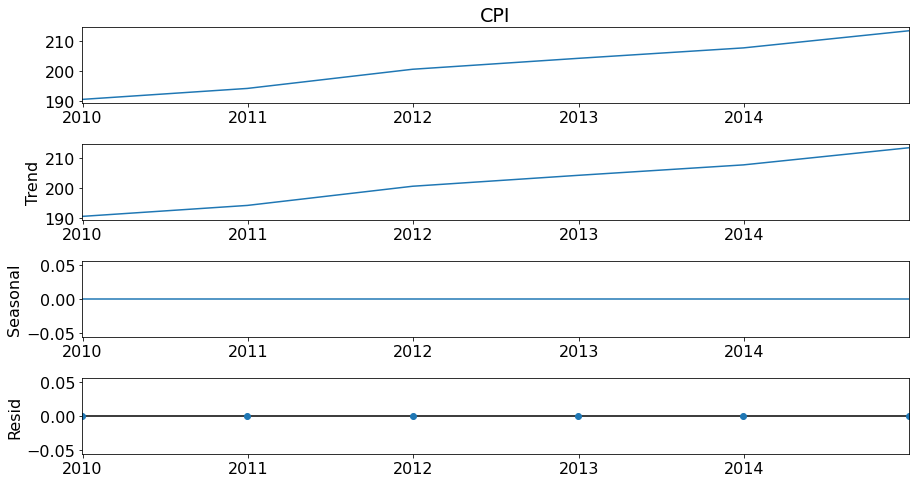

In [43]:
# decompose the data
sm.tsa.seasonal_decompose(y.resample('Y').mean()).plot()

#### Group the CPI time series by month of year, to explore annual seasonality.

<AxesSubplot:xlabel='month', ylabel='CPI'>

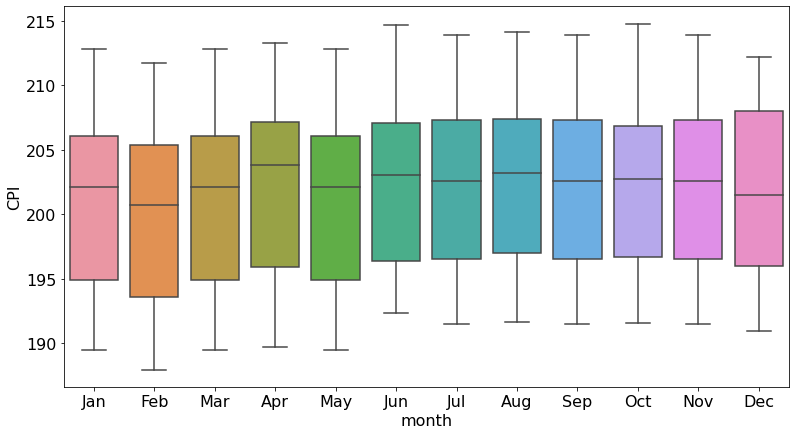

In [44]:
# CPI by month
sns.boxplot(data = train, x = 'month', y = 'CPI')

<AxesSubplot:xlabel='Year', ylabel='CPI'>

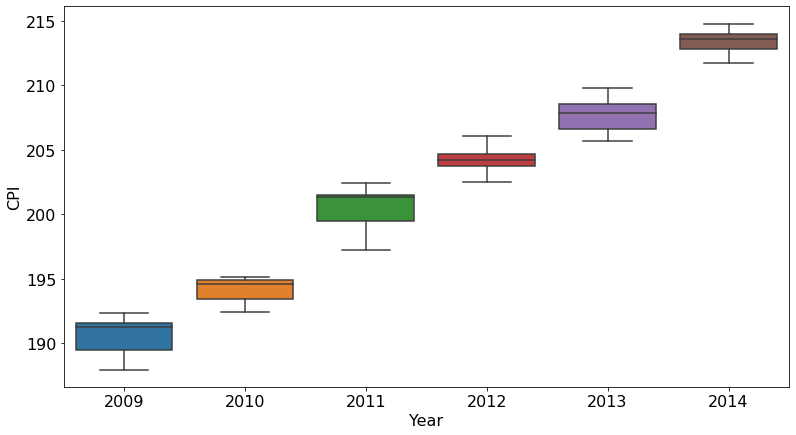

In [45]:
# CPI by Year
sns.boxplot(data = train, x = 'Year', y = 'CPI')

### Modeling

- Save for later when adding additional CPI items

"""
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()
 """

In [46]:
# evaluate() will compute the Mean Squared Error and the Root Mean Squared Error to evaluate.
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 3)
    return rmse

In [47]:
# plot_and_eval() will use the evaluate function and also plot train and test values with the predicted values in order to compare performance.
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [48]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [49]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

#### Last Observe value

In [50]:
# take the last observation of CPI and assign to variable
last_cpi = train['CPI'][-1:][0]
last_cpi

212.169

In [51]:
yhat_df = pd.DataFrame({'CPI': [last_cpi]}, index=validate.index)

yhat_df.head()

,CPI
year_month,
2015-01-01,212.169
2015-02-01,212.169
2015-03-01,212.169
2015-04-01,212.169
2015-05-01,212.169


In [52]:
yhat_df.describe()

,CPI
count,7.200000e+01
mean,2.121690e+02
std,1.144846e-13
min,2.121690e+02
25%,2.121690e+02
50%,2.121690e+02
75%,2.121690e+02
max,2.121690e+02


CPI -- RMSE: 12


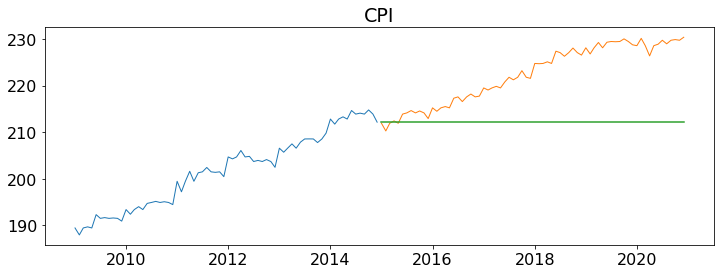

In [53]:
plot_and_eval('CPI')

In [54]:
eval_df = append_eval_df(model_type = 'last_observed_value', target_var = 'CPI')
eval_df

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,CPI,12.004


- code to drop row by index
eval_df.drop([0,1], axis=0, inplace=True)

eval_df

#### Simple Average

In [55]:
# compute simple average
avg_cpi = round(train['CPI'].mean(), 2)
avg_cpi

201.81

In [56]:
#Apply predictions to our observations
def make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'CPI': [avg_cpi]}, index=validate.index)
    return yhat_df

yhat_df = make_predictions(avg_cpi)

In [57]:
yhat_df.head()

,CPI
year_month,
2015-01-01,201.81
2015-02-01,201.81
2015-03-01,201.81
2015-04-01,201.81
2015-05-01,201.81


In [58]:
yhat_df.describe()

,CPI
count,7.200000e+01
mean,2.018100e+02
std,1.431058e-13
min,2.018100e+02
25%,2.018100e+02
50%,2.018100e+02
75%,2.018100e+02
max,2.018100e+02


CPI -- RMSE: 22


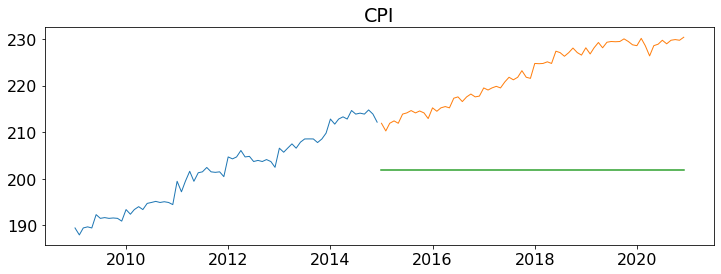

In [59]:
plot_and_eval('CPI')

In [60]:
eval_df = append_eval_df(model_type = 'simple_average', target_var = 'CPI')
eval_df

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,CPI,12.004
1,simple_average,CPI,21.54


#### Moving Average

In [61]:
# demonstrate that the mean of the first 30 days 
# is equal to rolling(30) on day 30

print(train['CPI'].rolling(4).mean())

year_month
2009-01-01          NaN
2009-02-01          NaN
2009-03-01          NaN
2009-04-01    189.15075
2009-05-01    189.15075
                ...    
2014-08-01    213.87500
2014-09-01    214.14000
2014-10-01    214.17075
2014-11-01    214.17075
2014-12-01    213.68750
Name: CPI, Length: 72, dtype: float64


In [62]:
# make predictions
period= 6
train['CPI'].rolling(period).mean()[-1]

213.79116666666664

In [63]:
period = 6 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_cpi = round(train['CPI'].rolling(period).mean()[-1], 2)
print(rolling_cpi)

213.79


In [64]:
#Apply predictions to our observations
def moving_avg_make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'CPI': [rolling_cpi]}, index=validate.index)
    return yhat_df

yhat_df = moving_avg_make_predictions(rolling_cpi)

In [65]:
yhat_df = moving_avg_make_predictions(rolling_cpi)
yhat_df.head()

,CPI
year_month,
2015-01-01,213.79
2015-02-01,213.79
2015-03-01,213.79
2015-04-01,213.79
2015-05-01,213.79


CPI -- RMSE: 11


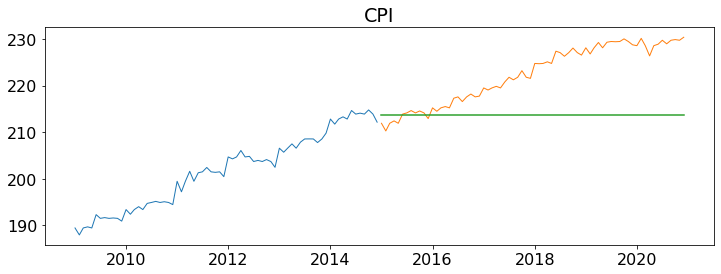

In [66]:
#Plot values
plot_and_eval('CPI')

In [67]:
periods = [1, 2, 3, 4, 6, 12, 24]

for p in periods: 
    rolling_cpi = round(train['CPI'].rolling(p).mean()[-1], 2)
    
    yhat_df = moving_avg_make_predictions(rolling_cpi)
    model_type = str(p) + '_month_moving_avg'
    eval_df = append_eval_df(model_type = model_type , target_var = 'CPI')

eval_df

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,model_type,target_var,rmse
0,last_observed_value,CPI,12.004
1,simple_average,CPI,21.54
2,1_month_moving_avg,CPI,12.003
3,2_month_moving_avg,CPI,11.277
4,3_month_moving_avg,CPI,10.79
5,4_month_moving_avg,CPI,10.733
6,6_month_moving_avg,CPI,10.652
7,12_month_moving_avg,CPI,10.962
8,24_month_moving_avg,CPI,13.396


#### Holts Linear Trend

In [68]:
#col =  
# create our Holt's Object
model = Holt(train['CPI'], exponential=False, damped=True)

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/3948876494.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['CPI'], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
# fit the holt's object
model = model.fit(optimized=True)

In [70]:
yhat_cpi = model.predict(start = validate.index[0],  end = validate.index[-1])

In [71]:
#print shape of validate and yhat_cpi
print(validate.shape , yhat_cpi.shape)

(72, 3) (72,)


In [72]:
yhat_cpi

2015-01-01    213.708387
2015-02-01    213.994919
2015-03-01    214.280019
2015-04-01    214.563694
2015-05-01    214.845950
                 ...    
2020-08-01    230.055802
2020-09-01    230.260598
2020-10-01    230.464369
2020-11-01    230.667122
2020-12-01    230.868861
Freq: MS, Length: 72, dtype: float64

In [73]:
validate

,Year,month,CPI
year_month,,,
2015-01-01,2015,Jan,211.926
2015-02-01,2015,Feb,210.283
2015-03-01,2015,Mar,211.926
2015-04-01,2015,Apr,212.439
2015-05-01,2015,May,211.926
...,...,...,...
2020-08-01,2020,Aug,228.978
2020-09-01,2020,Sep,229.742
2020-10-01,2020,Oct,229.885


In [74]:
model = Holt(train['CPI'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_cpi = model.predict(start = validate.index[0], end = validate.index[-1])
yhat_df['CPI'] = round(yhat_cpi, 2)

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/2517724034.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['CPI'], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
yhat_df

,CPI
year_month,
2015-01-01,213.71
2015-02-01,213.99
2015-03-01,214.28
2015-04-01,214.56
2015-05-01,214.85
...,...
2020-08-01,230.06
2020-09-01,230.26
2020-10-01,230.46


CPI -- RMSE: 2


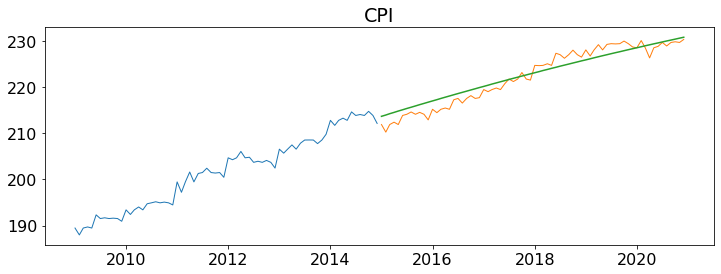

In [76]:
plot_and_eval(target_var = "CPI")

In [77]:
eval_df = append_eval_df(model_type = 'holts_optimized', target_var = "CPI")

eval_df


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,CPI,12.004
1,simple_average,CPI,21.54
2,1_month_moving_avg,CPI,12.003
3,2_month_moving_avg,CPI,11.277
4,3_month_moving_avg,CPI,10.79
5,4_month_moving_avg,CPI,10.733
6,6_month_moving_avg,CPI,10.652
7,12_month_moving_avg,CPI,10.962
8,24_month_moving_avg,CPI,13.396
9,holts_optimized,CPI,1.762


code for loop in future when added additional data
```
col = 'sales_total'
# create the Holt object 
model = Holt(train[col], exponential=False, damped=True)
# fit the model 
model = model.fit(optimized=True)
# make predictions for each date in validate 
yhat_items = model.predict(start = validate.index[0], end = validate.index[-1])
# add predictions to yhat_df
yhat_df[col] = round(yhat_items, 2)
```

plot and evaluate
```
for col in train.columns:
    plot_and_eval(target_var = col)
```
Append to model table
```
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', target_var = col)
```

#### Predict Based on Previous Cycle

- Reminder of split data
```
train = df[:'2014']
validate = df['2015':'2020']
test = df['2021']
```

In [78]:
train.head(3)

,Year,month,CPI
year_month,,,
2009-01-01,2009,Jan,189.465
2009-02-01,2009,Feb,187.972
2009-03-01,2009,Mar,189.465


In [79]:
# finding the year-over-year difference for each day from 2009 to 2014
# taking the mean, and then adding that value to the daily 2015 values. 

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df = train.CPI[:'2015' ] + train.CPI.diff(0).mean()

In [80]:
train.CPI.diff(3).mean()

1.0717826086956521

In [81]:
yhat_df

year_month
2009-01-01    189.465
2009-02-01    187.972
2009-03-01    189.465
2009-04-01    189.701
2009-05-01    189.465
               ...   
2014-08-01    214.102
2014-09-01    213.895
2014-10-01    214.791
2014-11-01    213.895
2014-12-01    212.169
Name: CPI, Length: 72, dtype: float64

In [82]:
yhat_df.shape

(72,)

In [83]:
# let's peek into the prediction we will make for 1/1/2016
# by comparing the predicted value 
# (2015 value + year-over-year average difference)
# to the actual 1/1/2016 value
pd.concat([yhat_df.head(1), validate.CPI.head(1)])

year_month
2009-01-01    189.465
2015-01-01    211.926
Name: CPI, dtype: float64

In [84]:
# set yhat_df to index of validate
yhat_df.index = validate.index

In [85]:
yhat_df = pd.DataFrame(yhat_df)
yhat_df

,CPI
year_month,
2015-01-01,189.465
2015-02-01,187.972
2015-03-01,189.465
2015-04-01,189.701
2015-05-01,189.465
...,...
2020-08-01,214.102
2020-09-01,213.895
2020-10-01,214.791


CPI -- RMSE: 21


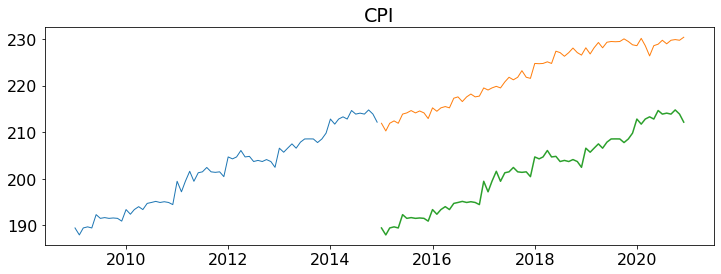

In [86]:
plot_and_eval(target_var = 'CPI')

CPI -- RMSE: 20


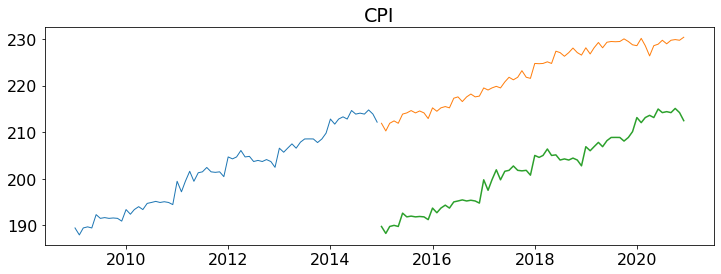

In [88]:

# find yoy diff. from 2013-2014 and 2014-2015, take the mean, and add to each value in 2015. 
yhat_df = train.CPI[:'2015' ] + train.CPI.diff(1).mean()
# set yhat_df to index of validate
yhat_df.index = validate.index

yhat_df = pd.DataFrame(yhat_df)

plot_and_eval(target_var = 'CPI')

0 past months cycle.
CPI -- RMSE: 21


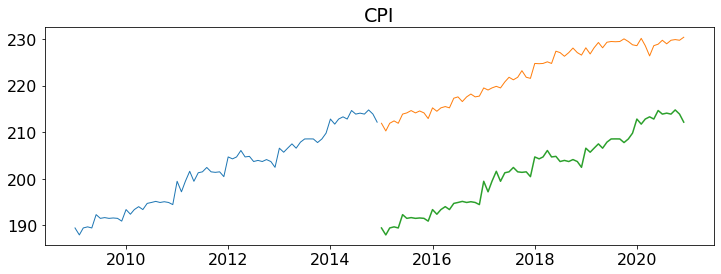

1 past months cycle.
CPI -- RMSE: 20


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


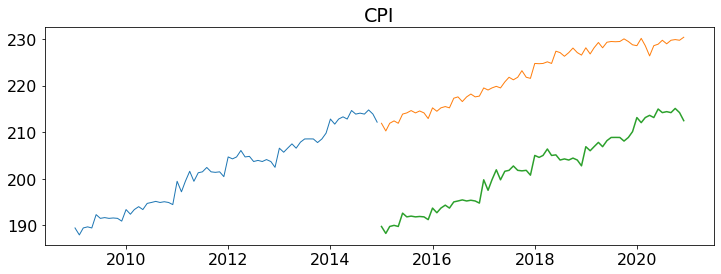

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


2 past months cycle.
CPI -- RMSE: 20


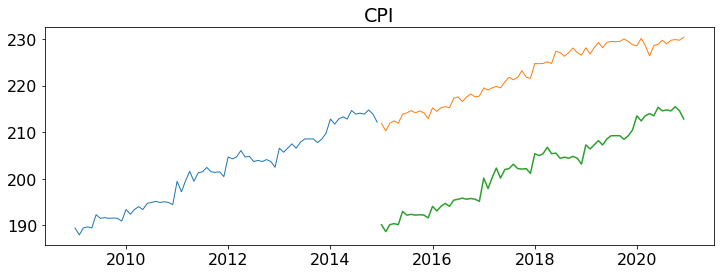

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


3 past months cycle.
CPI -- RMSE: 20


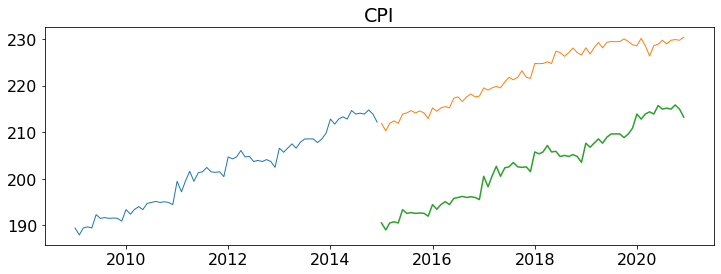

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


4 past months cycle.
CPI -- RMSE: 19


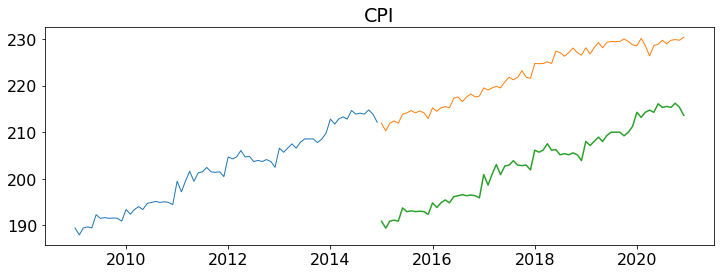

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


5 past months cycle.
CPI -- RMSE: 19


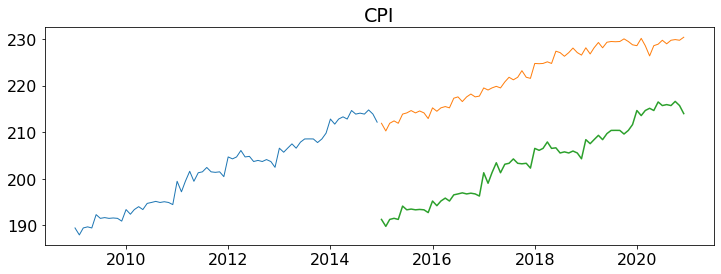

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


6 past months cycle.
CPI -- RMSE: 19


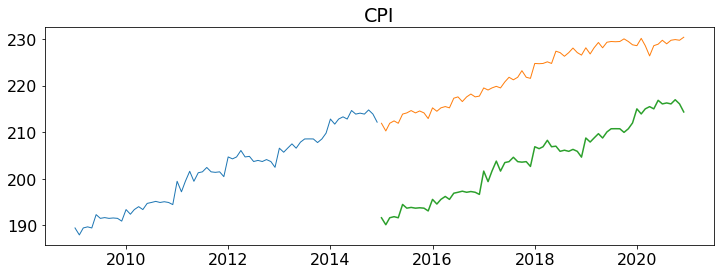

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


7 past months cycle.
CPI -- RMSE: 18


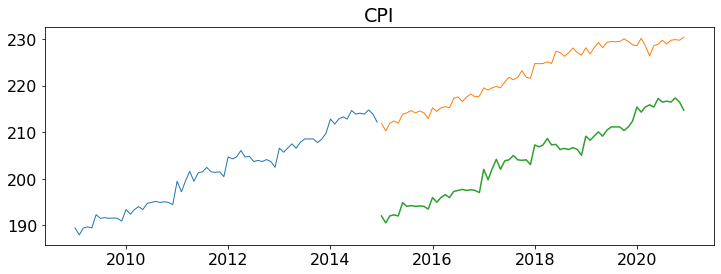

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


8 past months cycle.
CPI -- RMSE: 18


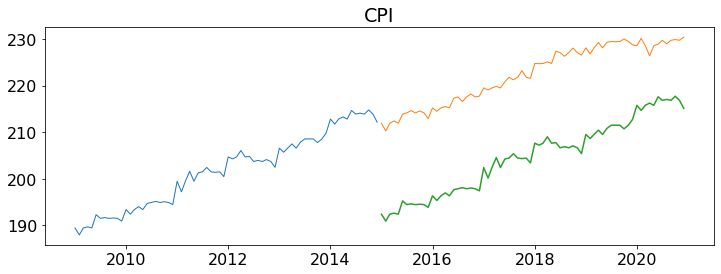

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


9 past months cycle.
CPI -- RMSE: 17


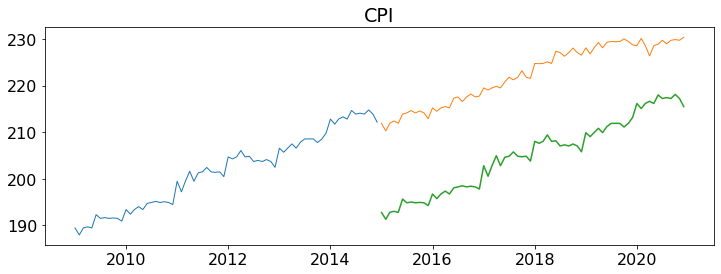

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


10 past months cycle.
CPI -- RMSE: 17


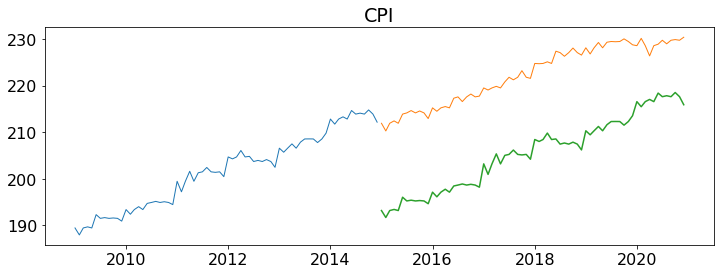

11 past months cycle.
CPI -- RMSE: 17


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


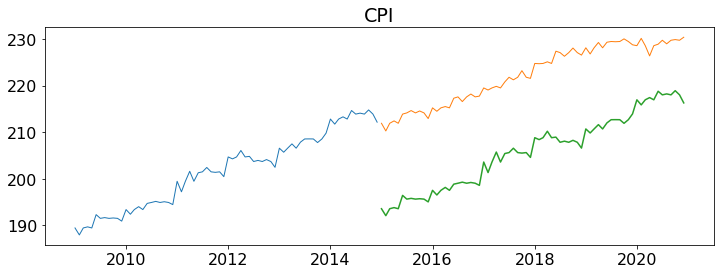

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


12 past months cycle.
CPI -- RMSE: 16


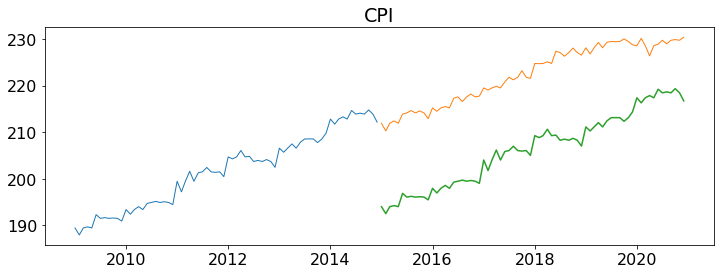

13 past months cycle.
CPI -- RMSE: 16


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


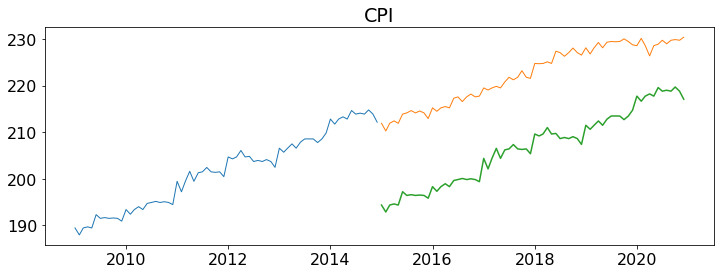

14 past months cycle.
CPI -- RMSE: 16


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


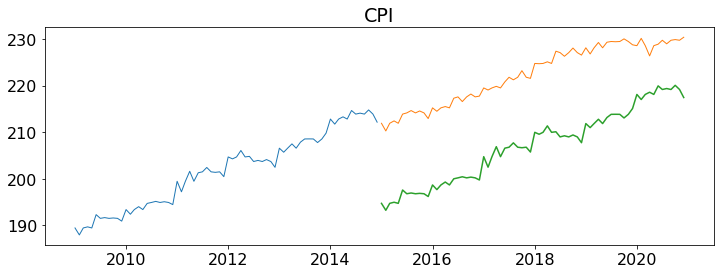

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


15 past months cycle.
CPI -- RMSE: 15


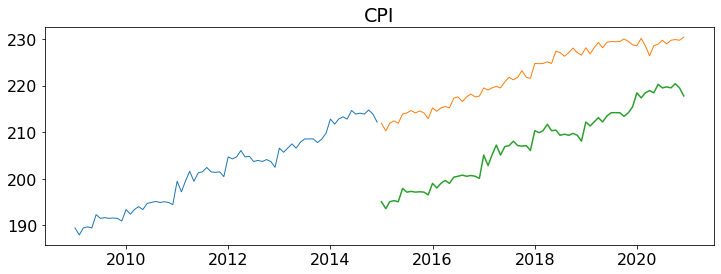

16 past months cycle.
CPI -- RMSE: 15


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


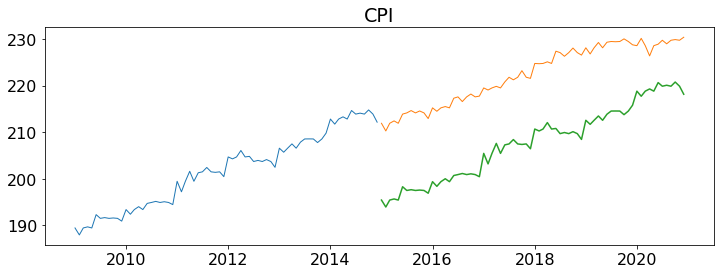

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


17 past months cycle.
CPI -- RMSE: 14


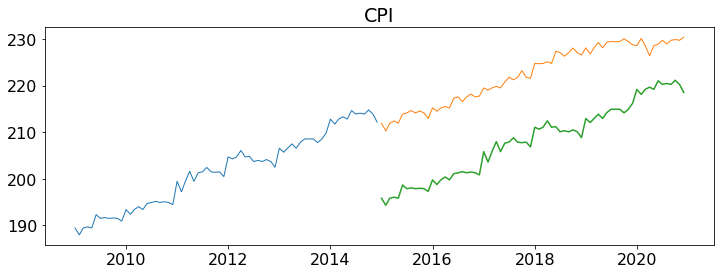

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


18 past months cycle.
CPI -- RMSE: 14


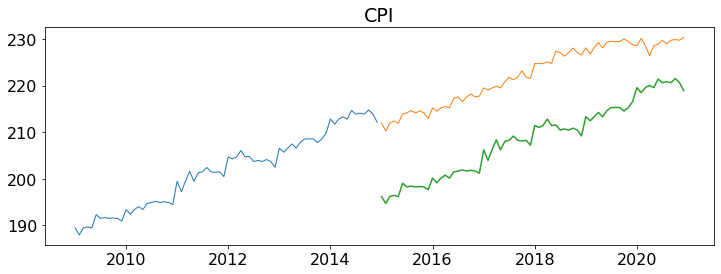

19 past months cycle.
CPI -- RMSE: 14


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


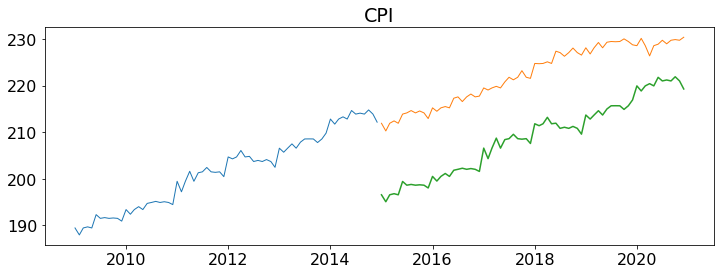

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


20 past months cycle.
CPI -- RMSE: 13


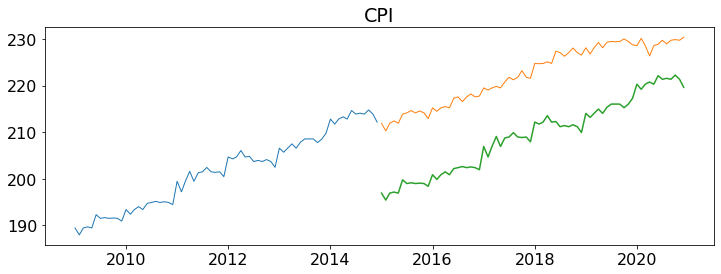

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


21 past months cycle.
CPI -- RMSE: 13


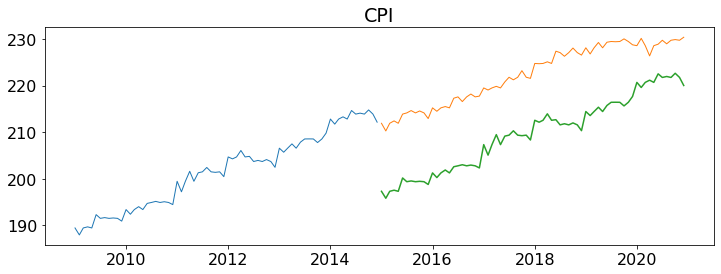

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


22 past months cycle.
CPI -- RMSE: 13


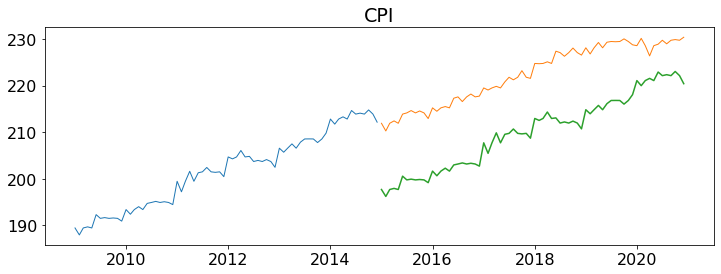

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


23 past months cycle.
CPI -- RMSE: 12


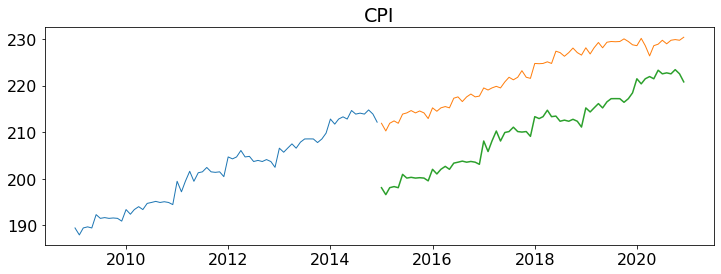

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


24 past months cycle.
CPI -- RMSE: 12


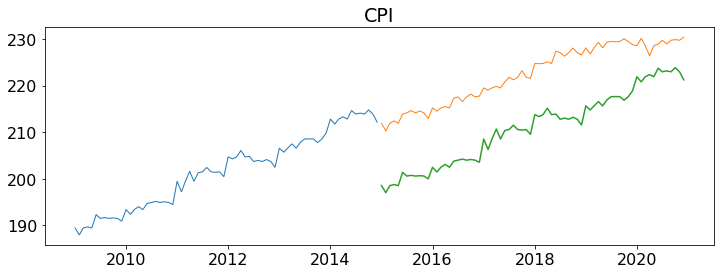

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


25 past months cycle.
CPI -- RMSE: 12


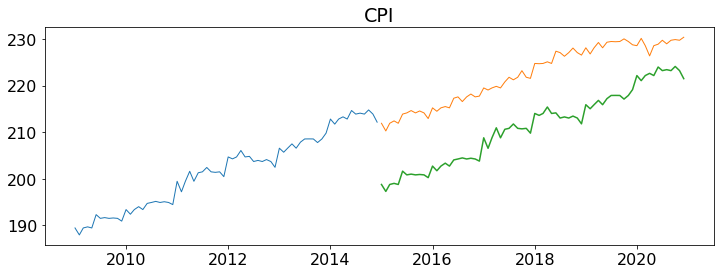

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


26 past months cycle.
CPI -- RMSE: 11


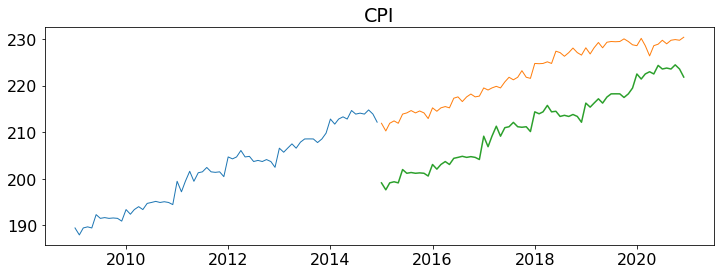

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


27 past months cycle.
CPI -- RMSE: 11


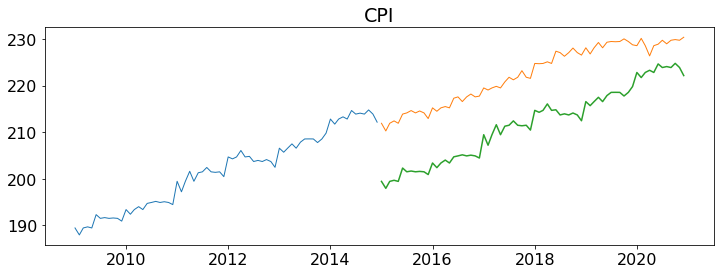

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


28 past months cycle.
CPI -- RMSE: 11


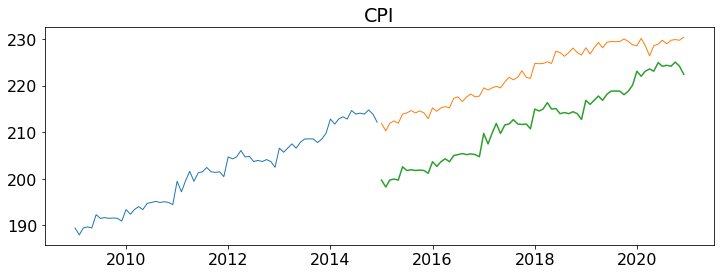

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


29 past months cycle.
CPI -- RMSE: 10


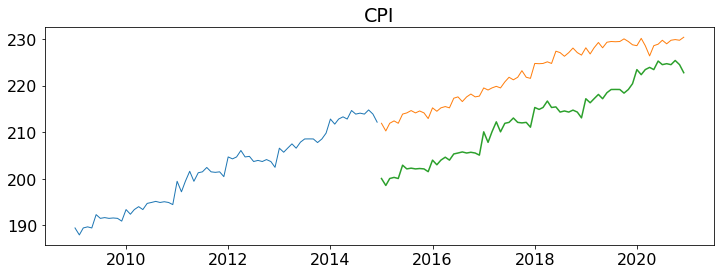

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


30 past months cycle.
CPI -- RMSE: 10


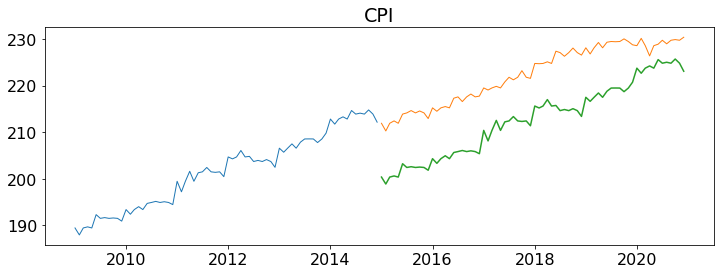

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


31 past months cycle.
CPI -- RMSE: 10


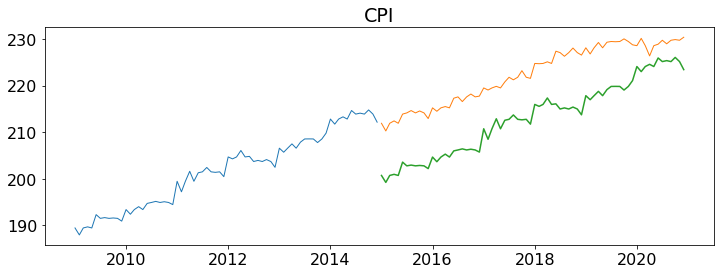

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


32 past months cycle.
CPI -- RMSE: 9


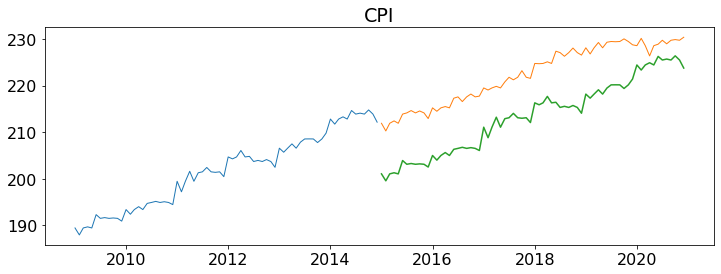

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


33 past months cycle.
CPI -- RMSE: 9


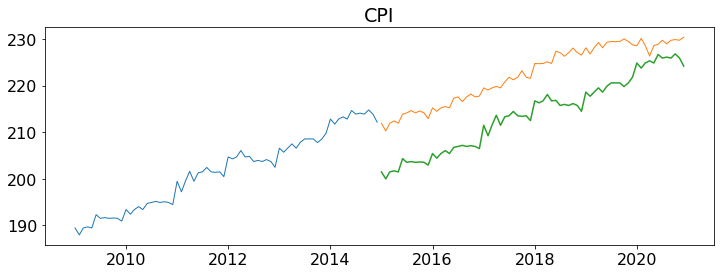

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


34 past months cycle.
CPI -- RMSE: 9


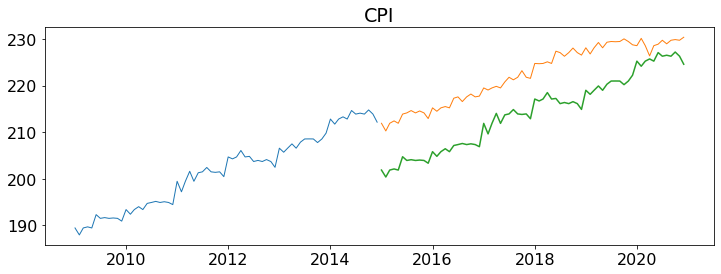

35 past months cycle.
CPI -- RMSE: 8


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


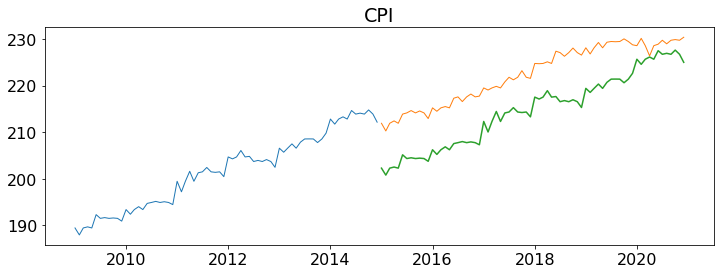

36 past months cycle.
CPI -- RMSE: 8


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


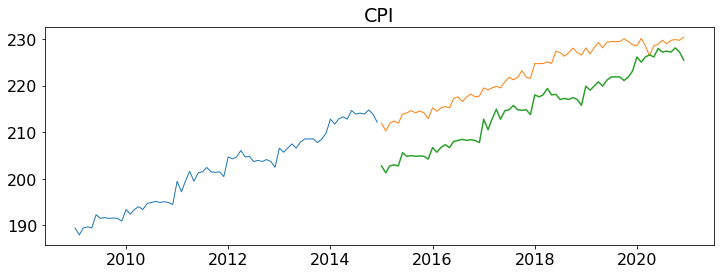

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


37 past months cycle.
CPI -- RMSE: 8


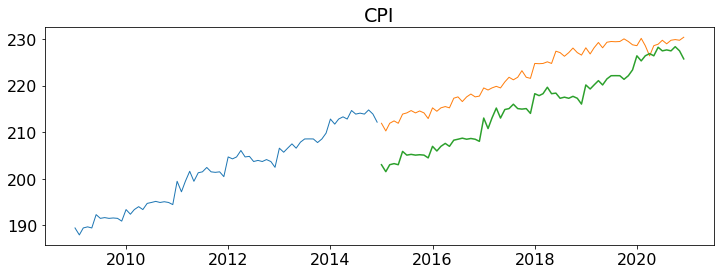

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


38 past months cycle.
CPI -- RMSE: 7


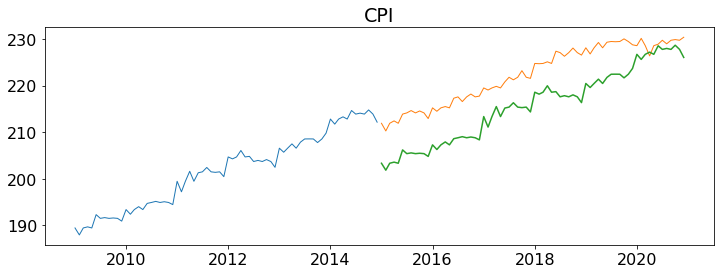

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


39 past months cycle.
CPI -- RMSE: 7


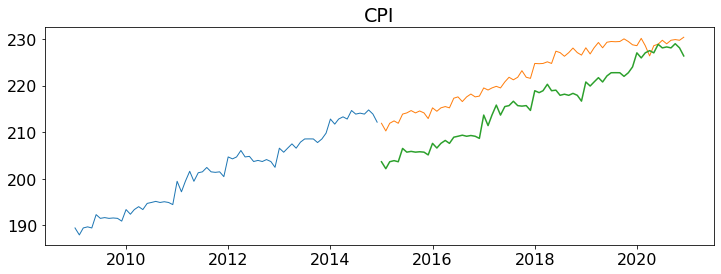

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


40 past months cycle.
CPI -- RMSE: 7


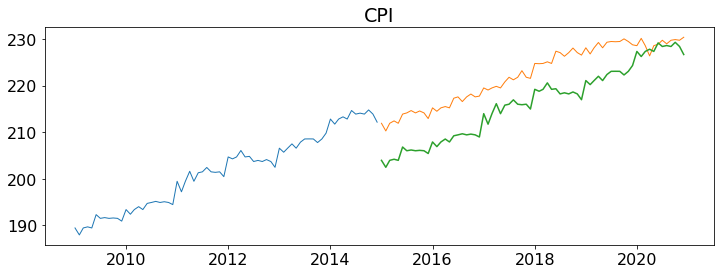

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


41 past months cycle.
CPI -- RMSE: 6


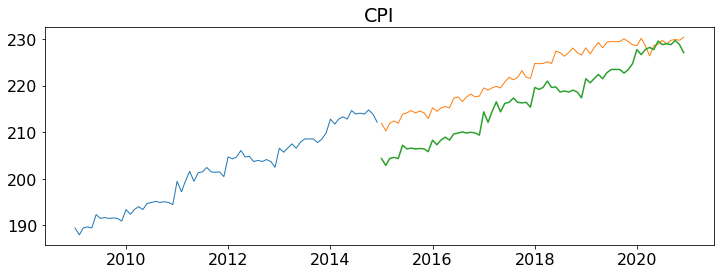

42 past months cycle.
CPI -- RMSE: 6


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


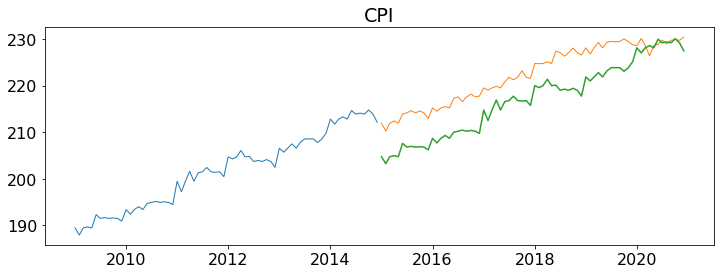

43 past months cycle.
CPI -- RMSE: 6


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


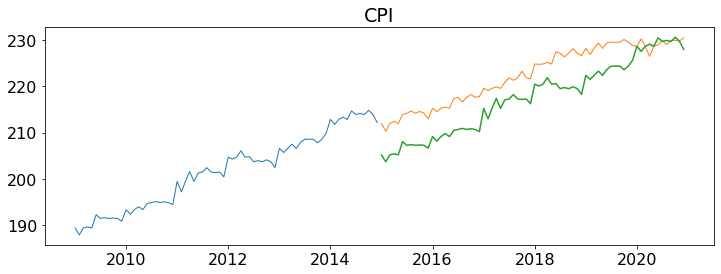

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


44 past months cycle.
CPI -- RMSE: 5


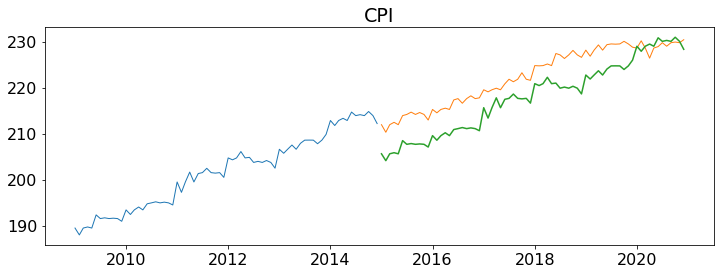

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


45 past months cycle.
CPI -- RMSE: 5


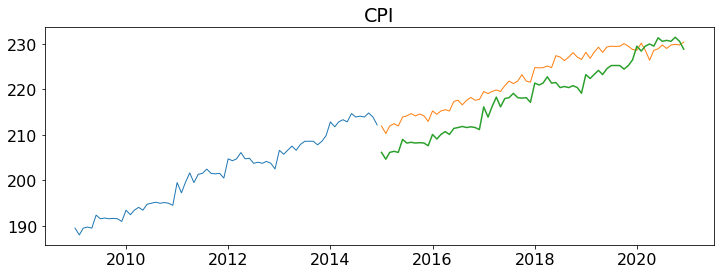

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


46 past months cycle.
CPI -- RMSE: 4


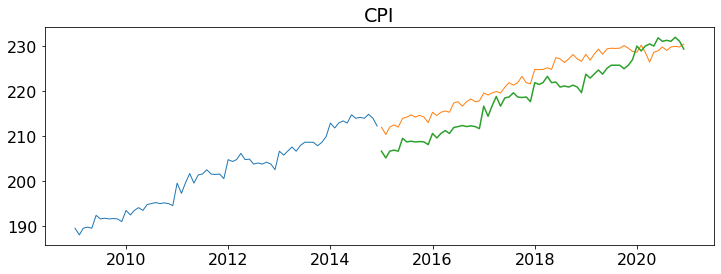

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


47 past months cycle.
CPI -- RMSE: 4


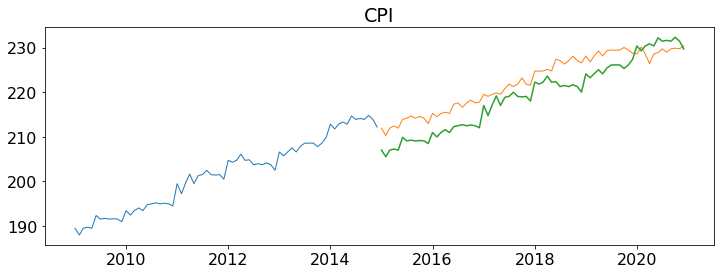

48 past months cycle.
CPI -- RMSE: 4


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


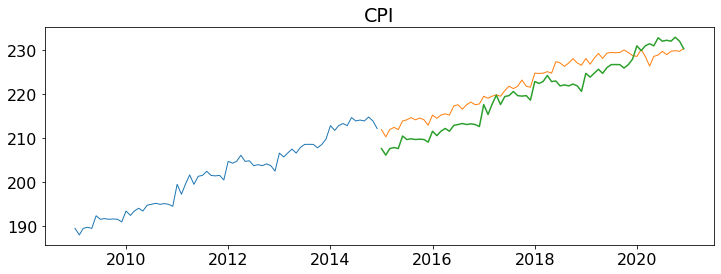

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


49 past months cycle.
CPI -- RMSE: 3


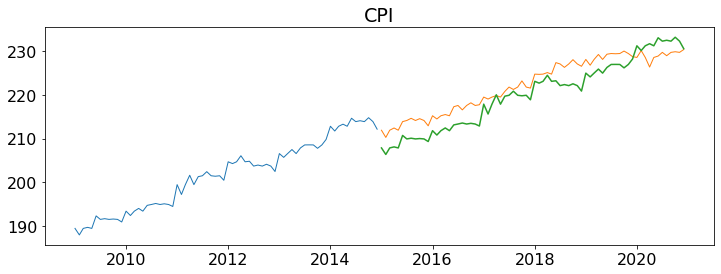

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


50 past months cycle.
CPI -- RMSE: 3


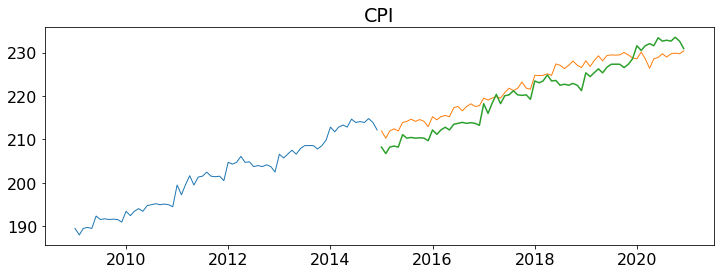

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


51 past months cycle.
CPI -- RMSE: 3


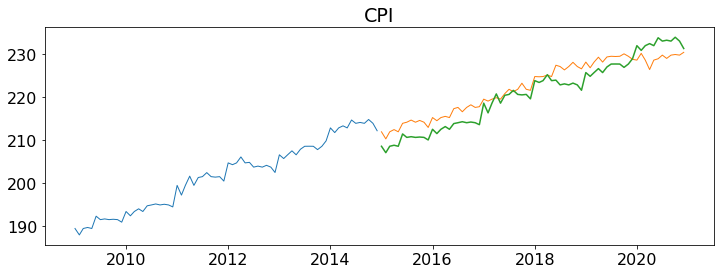

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


52 past months cycle.
CPI -- RMSE: 3


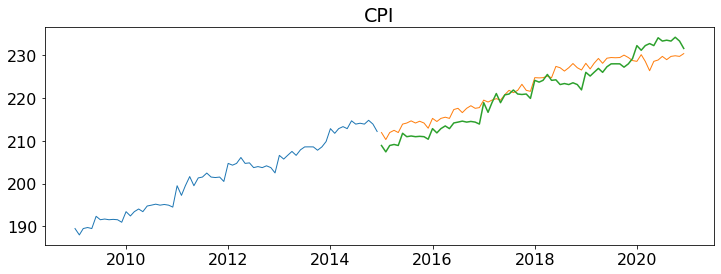

53 past months cycle.
CPI -- RMSE: 3


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


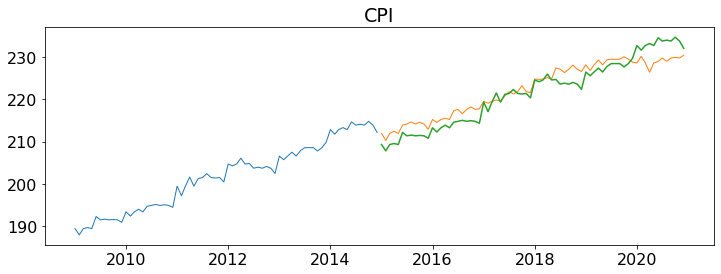

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


54 past months cycle.
CPI -- RMSE: 3


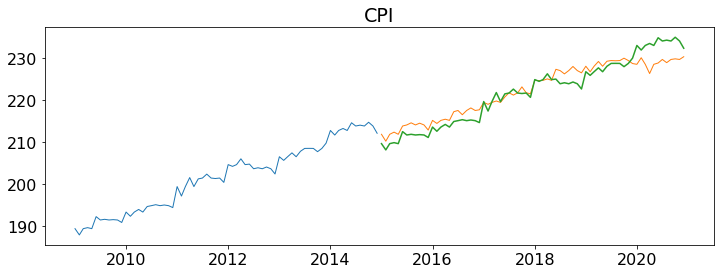

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


55 past months cycle.
CPI -- RMSE: 3


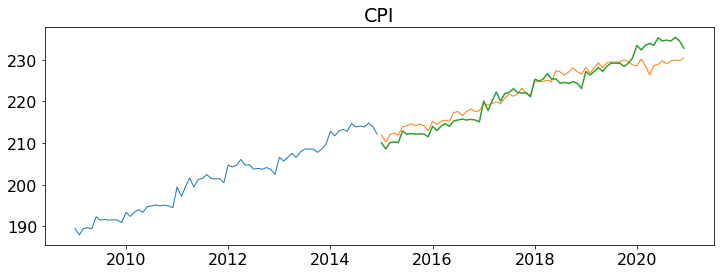

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


56 past months cycle.
CPI -- RMSE: 3


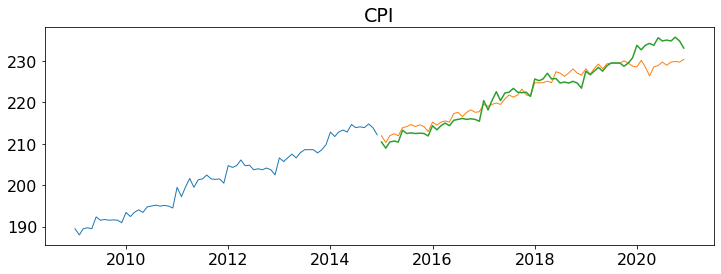

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


57 past months cycle.
CPI -- RMSE: 3


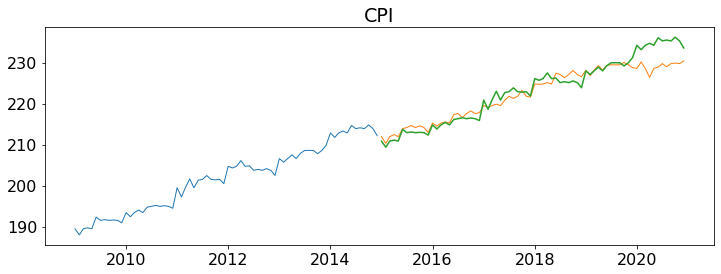

58 past months cycle.
CPI -- RMSE: 3


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


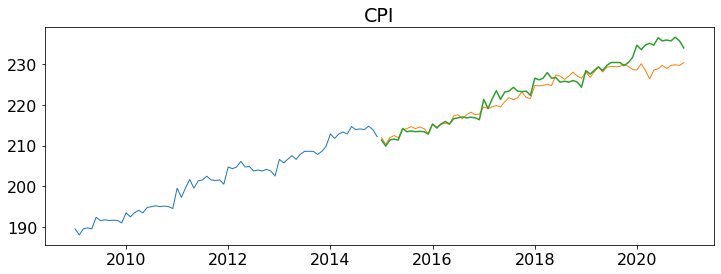

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


59 past months cycle.
CPI -- RMSE: 3


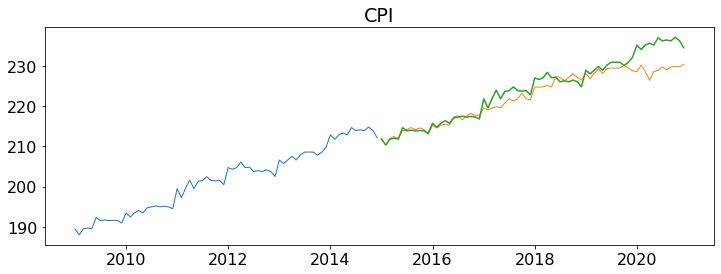

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


60 past months cycle.
CPI -- RMSE: 3


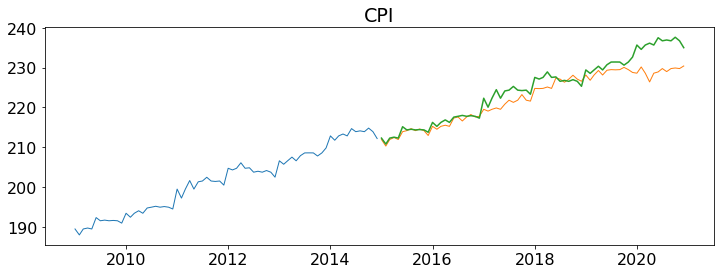

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


61 past months cycle.
CPI -- RMSE: 3


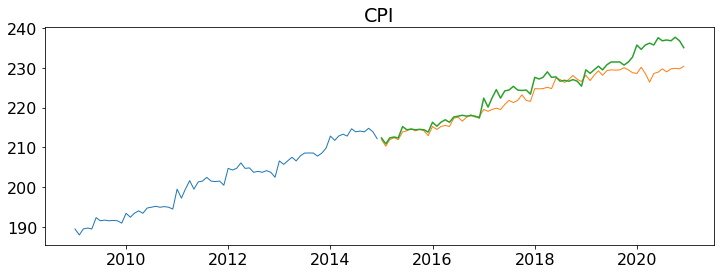

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


62 past months cycle.
CPI -- RMSE: 4


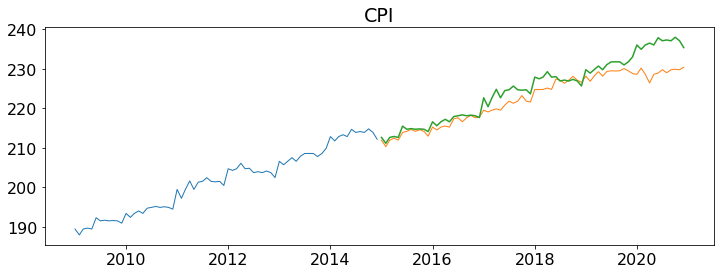

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


63 past months cycle.
CPI -- RMSE: 4


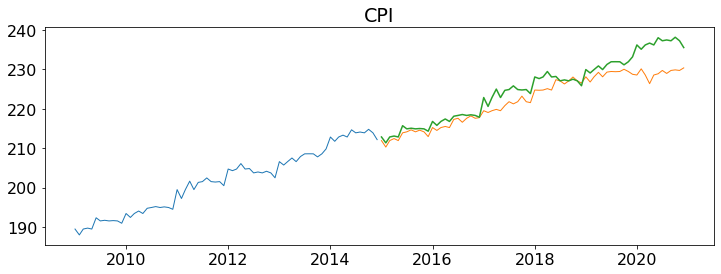

64 past months cycle.
CPI -- RMSE: 4


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


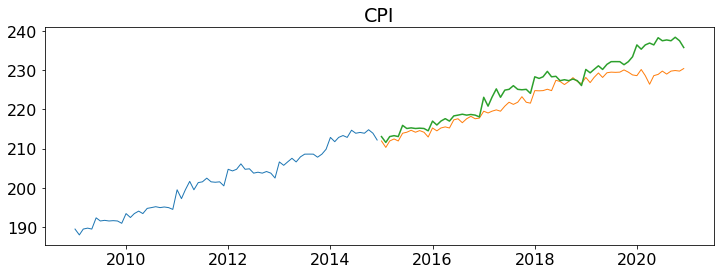

65 past months cycle.
CPI -- RMSE: 4


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


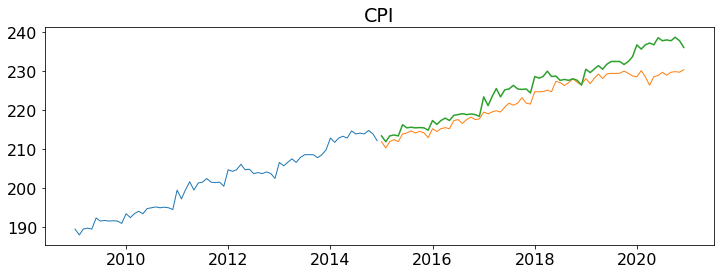

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


66 past months cycle.
CPI -- RMSE: 4


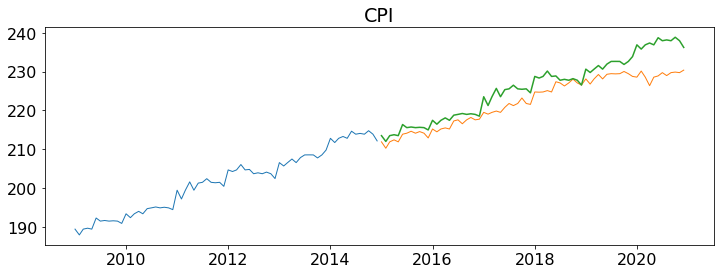

67 past months cycle.
CPI -- RMSE: 5


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


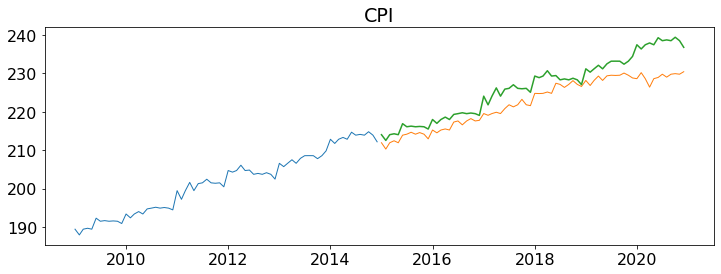

68 past months cycle.
CPI -- RMSE: 5


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


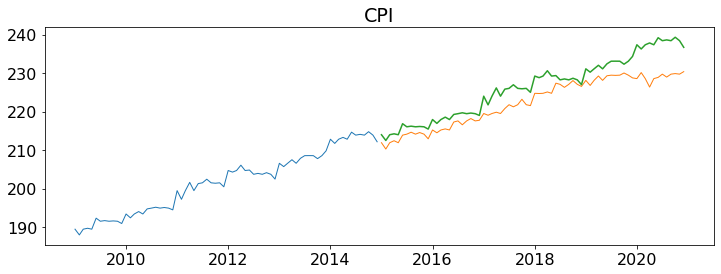

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


69 past months cycle.
CPI -- RMSE: 5


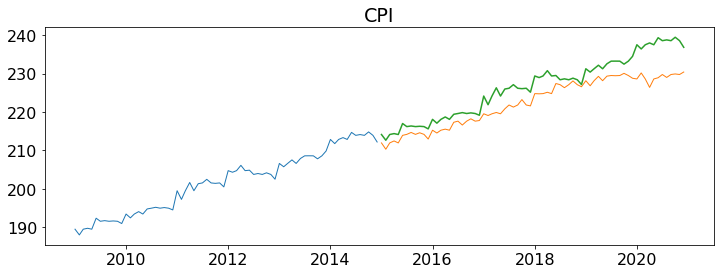

70 past months cycle.
CPI -- RMSE: 4


/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


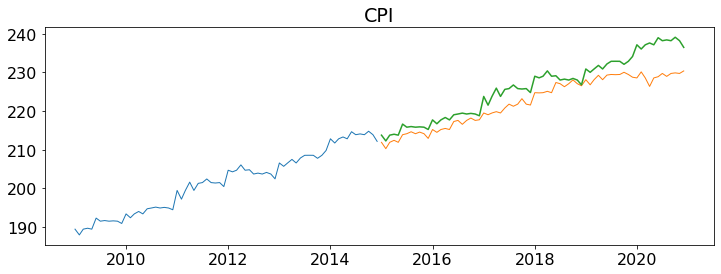

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


71 past months cycle.
CPI -- RMSE: 3


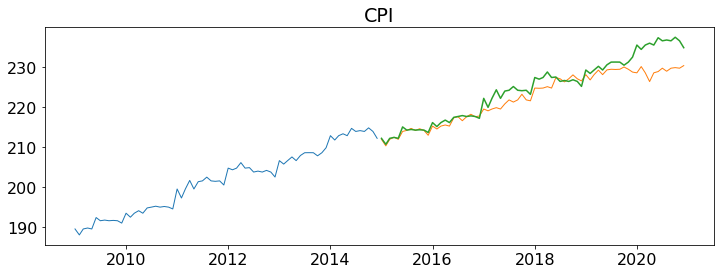

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/1340801264.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [90]:
x = range(72)
for n in x:
    yhat_df = train.CPI[:'2015' ] + train.CPI.diff(n).mean()
    yhat_df.index = validate.index
    yhat_df = pd.DataFrame(yhat_df)
    print(f"{n} past months cycle.")
    plot_and_eval(target_var = 'CPI')
    eval_df = append_eval_df(model_type = (f"{n}_past_months"), target_var = 'CPI')

#### Which model did the best?

In [91]:
eval_df.sort_values(by=['rmse'], ascending=True)

,model_type,target_var,rmse
9,holts_optimized,CPI,1.762
65,55_past_months,CPI,2.565
66,56_past_months,CPI,2.586
64,54_past_months,CPI,2.593
63,53_past_months,CPI,2.676
...,...,...,...
13,3_past_months,CPI,19.713
12,2_past_months,CPI,20.087
11,1_past_months,CPI,20.459
10,0_past_months,CPI,20.777


**Takeaway**

The Holts_optimized model performed the best with a RMSE of 1.72 and simple_average model performed the worst with a RMSE of 21.54.

#### Run best performing model on test sample.

In [92]:
model = Holt(train['CPI'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_cpi = model.predict(start = test.index[0], end = test.index[-1])
yhat_cpi = pd.DataFrame(yhat_cpi)
yhat_cpi.rename(columns={0 : 'CPI'}, inplace=True)
# set yhat_df to index of test
yhat_df = pd.DataFrame({'CPI': [range(12)]},index=test.index)
yhat_df['CPI'] = round(yhat_cpi, 2)

/var/folders/rd/19zrhwrn1nsc991_9c0rh2zw0000gn/T/ipykernel_26501/246031407.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['CPI'], exponential=False, damped=True)
/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [96]:
#print shape of validate and yhat_cpi
print(test.shape , yhat_cpi.shape, yhat_df.shape)

(12, 3) (12, 1) (12, 1)


In [94]:
yhat_cpi

,CPI
2021-01-01,231.069591
2021-02-01,231.269318
2021-03-01,231.468046
2021-04-01,231.665780
2021-05-01,231.862526
2021-06-01,232.058288
2021-07-01,232.253071
2021-08-01,232.446880
2021-09-01,232.639720
2021-10-01,232.831596


In [97]:
yhat_df

,CPI
year_month,
2021-01-01,231.07
2021-02-01,231.27
2021-03-01,231.47
2021-04-01,231.67
2021-05-01,231.86
2021-06-01,232.06
2021-07-01,232.25
2021-08-01,232.45
2021-09-01,232.64


In [122]:
test.CPI

year_month
2021-01-01    235.254
2021-02-01    232.442
2021-03-01    235.254
2021-04-01    236.604
2021-05-01    235.254
2021-06-01    239.374
2021-07-01    242.696
2021-08-01    241.088
2021-09-01    242.696
2021-10-01    243.813
2021-11-01    242.696
2021-12-01    245.509
Name: CPI, dtype: float64

In [113]:
# evaluation function to compute rmse
def evaluate_test(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse


In [120]:
def plot_and_eval_test(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(test[target_var], label='Actual', linewidth=1)
    plt.plot(yhat_df[target_var], label='Prediction', linewidth=1)
    plt.title(target_var)
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.legend()
    plt.show()

CPI -- RMSE: 8


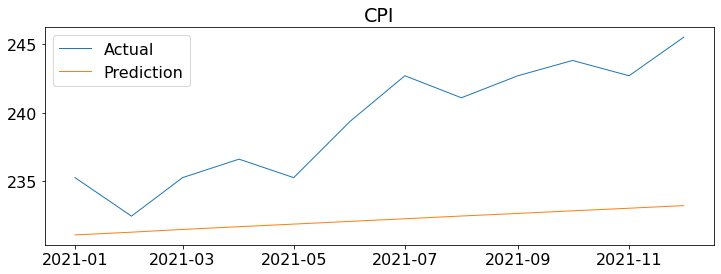

In [121]:
plot_and_eval_test(target_var = "CPI")